## Final Project Submission

Please fill out:
* Student name: Rachel Beery
* Student pace: Full time
* Scheduled project review date/time: 9/21/2020 5:00 P.M.
* Instructor name: James
* Blog post URL:


### Need to inser Image

# Module 2 Final Project: King County Housing Authority 

**Objective:** In this project we will be finding the best model for interpretability so that our non-technical audience can understand the findings of our modeling. 

**Approach:** The OSEUMiN data science workflow is utilized to effectively create a model to find what factors can result in the most profitable house.

**Data:** The data used for this project was records of houses sold in King County Washington. The columns of data provided include:

* **id** - unique identifier for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zip code** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

**Audience:** Non-technical audience of homeowners within King County, Washington who are interested to know what they can do to improve their home to maximize the selling price of their homes.

Questions we will be answering in this notebook:

* What features of a house yield make the house sell at a higher price?

* What effect does outliers have on our outcomes and overall data?

* How will multicollinearity affect what feature yields the highest selling price?

* 

# Importing Packages & Our Data

In [2]:
#We begin by importing all the packages we will need to read and clean the datasets, analyze the data, and finally make visualizations 
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.ticker as mtick
import plotly.express as px
import math
import scipy.stats as stats
import missingno as ms
#for feature engineering
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import VarianceThreshold, SelectFromModel
linreg = LinearRegression()

In [3]:
# Setting the display defaults
pd.set_option('display.max_columns', 0)
pd.set_option('display.max_rows', None)

# Turning off scientific notation in pandas
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [4]:
#Import data and see the headers
house_data = pd.read_csv(r"kc_house_data.csv")
house_data.head()

id        date      price  ...     long  sqft_living15  sqft_lot15
0  7129300520  10/13/2014 221900.000  ... -122.257           1340        5650
1  6414100192   12/9/2014 538000.000  ... -122.319           1690        7639
2  5631500400   2/25/2015 180000.000  ... -122.233           2720        8062
3  2487200875   12/9/2014 604000.000  ... -122.393           1360        5000
4  1954400510   2/18/2015 510000.000  ... -122.045           1800        7503

[5 rows x 21 columns]

In [5]:
# How many houses are in our dataset
house_data.shape

(21597, 21)

In [6]:
# Looking at our columns and seeing what data types they are
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


# Scrub

First we will address the target: price of house

In [7]:
# Changing dtypes that we know is numbers
house_data.price = house_data.price.astype('int64')

In [8]:
house_data.price.describe()

count     21597.000
mean     540296.574
std      367368.140
min       78000.000
25%      322000.000
50%      450000.000
75%      645000.000
max     7700000.000
Name: price, dtype: float64

In [9]:
# Looking at all the object columns and seeing the unique values in each
objects = house_data.select_dtypes(include='object')
house_data.nunique()

id               21420
date               372
price             3622
bedrooms            12
bathrooms           29
sqft_living       1034
sqft_lot          9776
floors               6
waterfront           2
view                 5
condition            5
grade               11
sqft_above         942
sqft_basement      304
yr_built           116
yr_renovated        70
zipcode             70
lat               5033
long               751
sqft_living15      777
sqft_lot15        8682
dtype: int64

In [10]:
# Finding out where null values are in DF
nulls = house_data.isna().sum()
only_nulls = nulls[nulls>0]/len(house_data)
only_nulls.to_frame('Percent Null').style.background_gradient(cmap='Reds')
# Waterfront and Year_renovated are only significant

In [11]:
null_cols = list(only_nulls.index)
null_cols

['waterfront', 'view', 'yr_renovated']

In [12]:
house_data[null_cols].mode()

waterfront  view  yr_renovated
0       0.000 0.000         0.000

In [13]:
house_data[null_cols].nunique()

waterfront       2
view             5
yr_renovated    70
dtype: int64

In [14]:
house_data.isna().sum(axis=1).value_counts()

0    15762
1     5391
2      442
3        2
dtype: int64

In [15]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


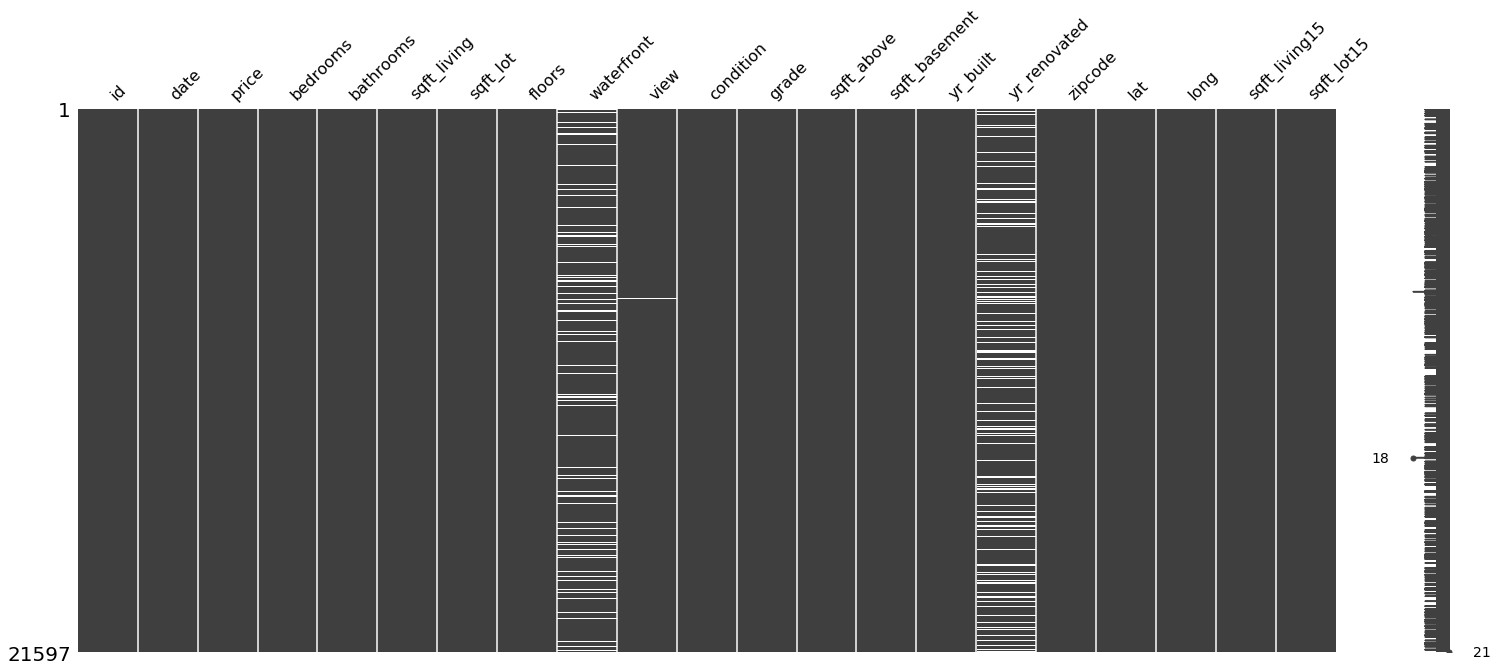

In [16]:
# Seeing if there is a pattern in specific houses that having nulls
import missingno as ms
ms.matrix(house_data)

In [17]:
### cat_cols = house_data.select_dt

In [18]:
### num_cols = house_data.select_dtypes('number').columns
### num_cols

In [19]:
# What columns have null values
house_data.isna().sum()
# We still have nulls in waterfront, view, and sqft_basement
# Going to these sections in the notebook to fix these columns

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [20]:
# Fix sqft of basement first
house_data['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
800.0       201
400.0       184
1000.0      148
300.0       142
900.0       142
200.0       105
750.0       104
450.0       103
530.0       103
480.0       103
720.0        98
620.0        90
580.0        84
840.0        83
420.0        81
860.0        79
1100.0       78
670.0        78
550.0        76
780.0        76
650.0        75
240.0        74
380.0        73
680.0        73
360.0        72
850.0        72
770.0        71
910.0        71
940.0        71
880.0        69
440.0        69
290.0        69
1200.0       69
350.0        68
520.0        68
630.0        66
920.0        66
960.0        65
730.0        65
430.0        64
740.0        64
640.0        63
760.0        63
1010.0       63
570.0        62
950.0        62
560.0        62
340.0        62
820.0        62
280.0        62
790.0        61
460.0        61
310.0        58
1060.0       58
980.0        57
830.0        56
540.0        55
810.0   

In [21]:
# Fixing the '?'
house_data['sqft_basement'].replace('?', np.nan, inplace = True) 
# Changing the dtype to float instead of string
house_data['sqft_basement'] = house_data['sqft_basement'].astype('float')

In [22]:
house_data['sqft_basement'].replace('?', '0')

0          0.000
1        400.000
2          0.000
3        910.000
4          0.000
5       1530.000
6            nan
7          0.000
8        730.000
9          0.000
10      1700.000
11       300.000
12         0.000
13         0.000
14         0.000
15       970.000
16         0.000
17         0.000
18           nan
19         0.000
20       760.000
21       720.000
22         0.000
23         0.000
24         0.000
25         0.000
26       700.000
27         0.000
28       730.000
29         0.000
30         0.000
31         0.000
32       820.000
33         0.000
34       780.000
35       790.000
36       730.000
37         0.000
38       330.000
39         0.000
40         0.000
41      1620.000
42           nan
43         0.000
44       360.000
45         0.000
46         0.000
47         0.000
48         0.000
49       588.000
50         0.000
51      1510.000
52       410.000
53       990.000
54       600.000
55         0.000
56         0.000
57         0.000
58         0.0

In [23]:
house_data['sqft_basement'].nunique()

303

In [24]:
# Nulls will be changed to the mode of 0.0 for basement sqft 
house_data['sqft_basement'].mode()
house_data['sqft_basement'].fillna(0.0, axis = 0, inplace = True)

In [25]:
# Changing 'sqft_basement' to int64
house_data.sqft_basement = house_data.sqft_basement.astype('int64')

In [26]:
### Data type is an object and needs to be changed to int64
house_data['date'].value_counts()

6/23/2014     142
6/25/2014     131
6/26/2014     131
7/8/2014      127
4/27/2015     126
3/25/2015     123
7/9/2014      121
4/14/2015     121
4/28/2015     121
4/22/2015     121
4/21/2015     119
6/24/2014     119
10/28/2014    117
8/26/2014     117
5/20/2014     116
7/14/2014     116
7/1/2014      115
8/20/2014     114
6/17/2014     113
4/29/2015     113
4/8/2015      112
7/29/2014     112
7/16/2014     111
5/28/2014     111
4/23/2015     110
3/27/2015     109
8/25/2014     109
8/5/2014      109
6/20/2014     107
7/23/2014     107
8/11/2014     107
7/22/2014     105
3/26/2015     105
6/3/2014      104
5/27/2014     104
9/23/2014     103
4/2/2015      103
8/22/2014     103
4/24/2015     103
5/4/2015      102
7/25/2014     102
8/27/2014     102
7/15/2014     102
4/7/2015      102
3/24/2015     101
6/19/2014     101
7/18/2014     100
6/4/2014      100
8/12/2014     100
3/4/2015      100
11/13/2014    100
9/24/2014      99
6/18/2014      99
2/24/2015      98
6/10/2014      98
6/16/2014 

In [27]:
# Changing the date column into a datetime
house_data['date'] = pd.to_datetime(house_data['date'])
# Making a new column for year
house_data['year'] = house_data['date'].dt.year
# Making a new column for month
house_data['month'] = house_data['date'].dt.month 
# Making a new column for day
house_data['day'] = house_data['date'].dt.dayofweek

In [28]:
house_data.drop(['date'], axis = 1, inplace = True)

In [29]:
# Looking to see the days of the week
house_data['day'].value_counts()

1    4710
2    4600
0    4097
3    3989
4    3684
5     287
6     230
Name: day, dtype: int64

In [30]:
# Changing the year column
type(house_data['year'][1])

numpy.int64

In [31]:
# Making a column for how old the house is
house_data['house_age'] = house_data['year'] - house_data['yr_built']

In [32]:
house_data.drop(['year', 'yr_built'], axis = 1, inplace = True)
house_data.head()

id   price  bedrooms  bathrooms  ...  sqft_lot15  month  day  house_age
0  7129300520  221900         3      1.000  ...        5650     10    0         59
1  6414100192  538000         3      2.250  ...        7639     12    1         63
2  5631500400  180000         2      1.000  ...        8062      2    2         82
3  2487200875  604000         4      3.000  ...        5000     12    1         49
4  1954400510  510000         3      2.000  ...        7503      2    2         28

[5 rows x 22 columns]

In [33]:
# Removing null values and changing the data type to integer
house_data['yr_renovated'].mode()
house_data['yr_renovated'].fillna(0.0, axis = 0, inplace = True)
house_data['yr_renovated'] = house_data['yr_renovated'].astype('int')
house_data['yr_renovated'].value_counts()

0       20853
2014       73
2003       31
2013       31
2007       30
2005       29
2000       29
2004       22
1990       22
2009       21
2006       20
1989       20
2002       17
1998       16
1984       16
1991       16
1999       15
2008       15
2010       15
2001       15
1983       15
1986       14
1985       14
1987       14
2015       14
1994       14
1992       13
1995       12
1993       12
1997       12
1996       11
1988       11
1970        9
2011        9
1980        8
2012        8
1982        8
1979        7
1977        7
1968        7
1975        5
1964        5
1963        4
1969        4
1981        4
1965        4
1973        4
1955        3
1956        3
1972        3
1978        3
1960        3
1958        3
1945        3
1962        2
1967        2
1957        2
1974        2
1940        2
1948        1
1959        1
1934        1
1971        1
1954        1
1950        1
1976        1
1953        1
1951        1
1946        1
1944        1
Name: yr_renovated, 

In [34]:
# There are many houses that dont have renovation
# Will make these Booleans with this function below

for i in house_data['yr_renovated']:
    if i > 0:
        house_data['yr_renovated'].replace(i, 1, inplace = True)

# Change column name
house_data['was_renovated'] = house_data['yr_renovated']
house_data.drop(['yr_renovated'], axis = 1, inplace = True)

print(house_data['was_renovated'].value_counts())
house_data.head()

0    20853
1      744
Name: was_renovated, dtype: int64


id   price  bedrooms  ...  day  house_age  was_renovated
0  7129300520  221900         3  ...    0         59              0
1  6414100192  538000         3  ...    1         63              1
2  5631500400  180000         2  ...    2         82              0
3  2487200875  604000         4  ...    1         49              0
4  1954400510  510000         3  ...    2         28              0

[5 rows x 22 columns]

In [35]:
# Is there anymore we need to fix befor outlier removal?
house_data.head()
house_data.isna().sum()

id                  0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
month               0
day                 0
house_age           0
was_renovated       0
dtype: int64

In [36]:
# Nulls will be changed to the mode of 0.0 for waterfront 
house_data['waterfront'].mode()
house_data['waterfront'].fillna(0.0, axis = 0, inplace = True)
# Changing the data type to integer
house_data['waterfront'] = house_data['waterfront'].astype(int)

In [37]:
# Nulls will be changed to the mode of 0.0 for viewed 
house_data['view'].mode()
house_data['view'].fillna(0.0, axis = 0, inplace = True)
# Changing the data type to integer
house_data['view'] = house_data['view'].astype(int)

In [38]:
house_data.isna().sum()
# Yay, there are no more null values

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
month            0
day              0
house_age        0
was_renovated    0
dtype: int64

In [39]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
id               21597 non-null int64
price            21597 non-null int64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null int32
view             21597 non-null int32
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null int64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
month            21597 non-null int64
day              21597 non-null int64
house_age        21597 non-null int64
was_renovated    21597 non-null int32
dtypes: float64(4), int32(3), int64(15)
memory 

In [40]:
# Going to go ahead and drop 'id', 'waterfront', & 'view' 
# because these are either irrelevent or cannot be changed by the homeowner
house_data.drop(['id'], axis = 1, inplace = True)
house_data.drop(['waterfront'], axis = 1, inplace = True)
house_data.drop(['view'], axis = 1, inplace = True)
house_data.drop(['day'], axis = 1, inplace = True)

In [41]:
house_data.month.value_counts()

5     2414
4     2229
7     2211
6     2178
8     1939
10    1876
3     1875
9     1771
12    1470
11    1409
2     1247
1      978
Name: month, dtype: int64

In [42]:
# Making seasons to see what time of year might have the highest selling points
def seasons(x):
    if x > 0 and x < 4:
        season = 1
    elif x > 3 and x < 7:
        season = 2
    elif x > 6 and x < 10:
        season = 3
    else:
        season = 4       
    return season

In [43]:
house_data['seasons'] = house_data['month'].map(seasons)

In [44]:
house_data.seasons.value_counts()
# The best = Season 2
# The worst = Season 1

2    6821
3    5921
4    4755
1    4100
Name: seasons, dtype: int64

In [45]:
house_data['has_basement'] = house_data['sqft_basement'].map(lambda x: x!=0 )

In [46]:
house_data['has_basement'] = house_data['has_basement'].astype('int64')

In [47]:
house_data.has_basement.value_counts()

0    13280
1     8317
Name: has_basement, dtype: int64

# Exploring

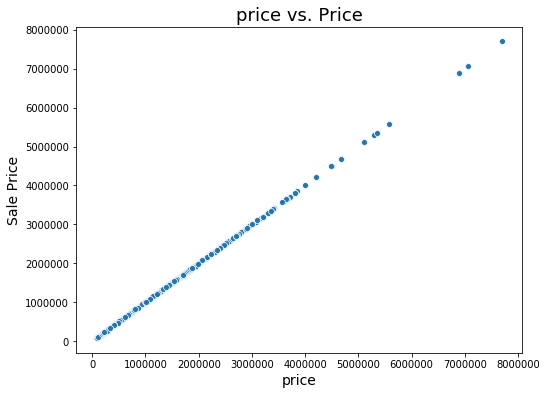

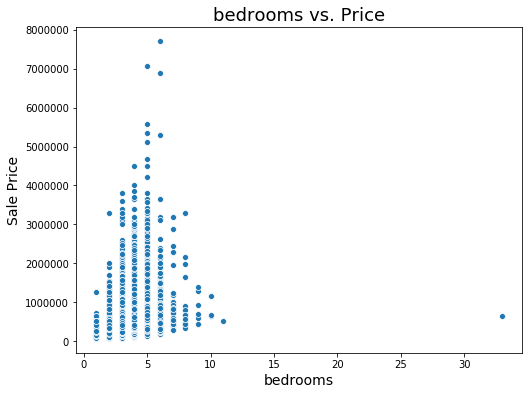

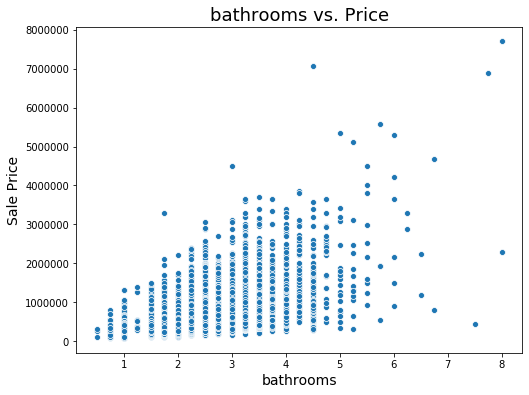

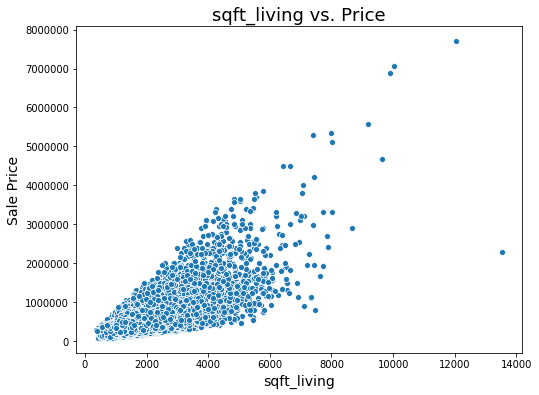

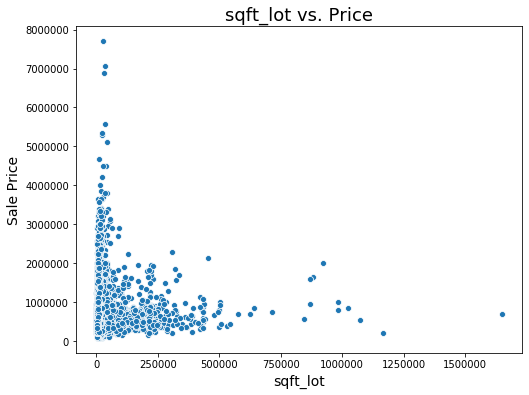

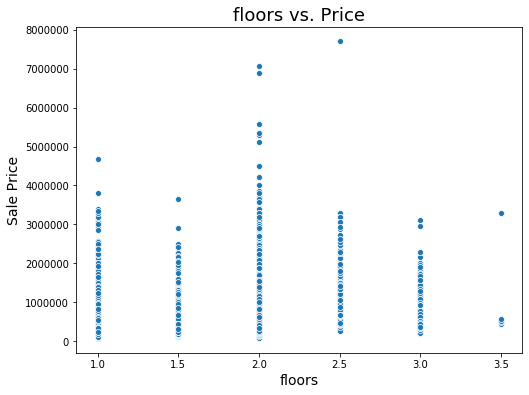

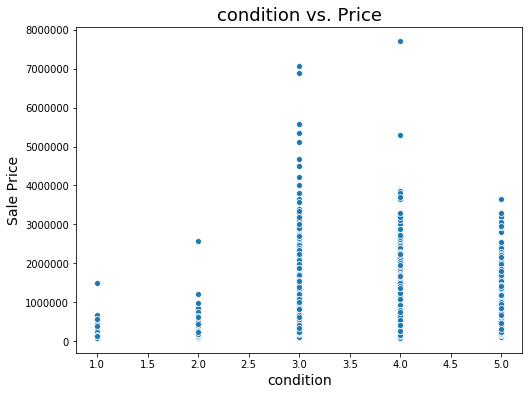

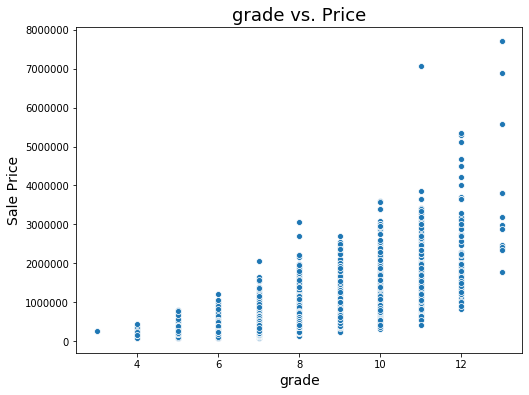

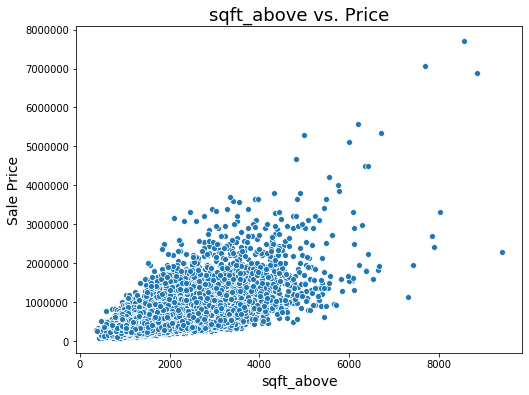

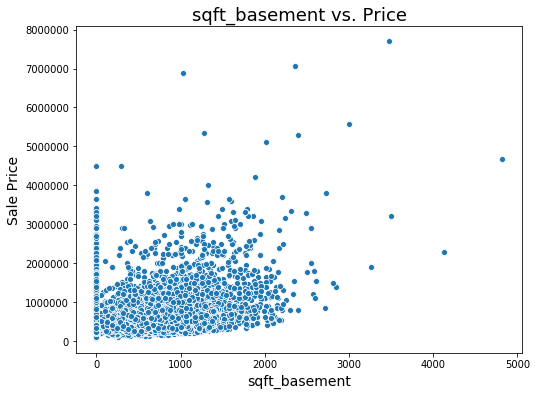

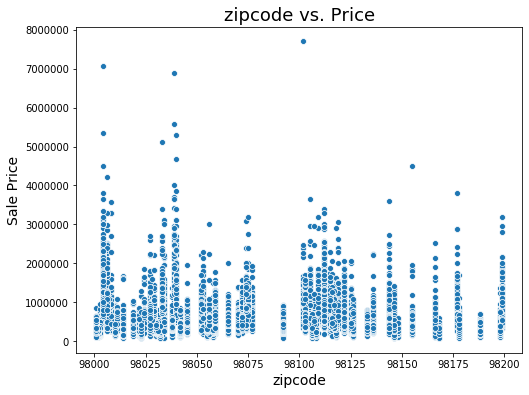

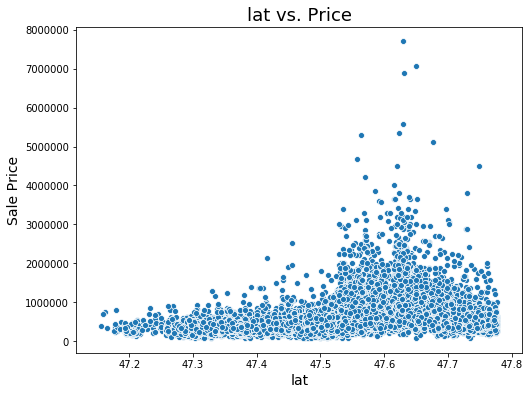

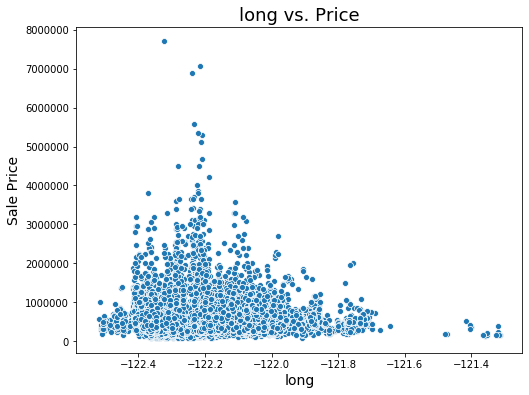

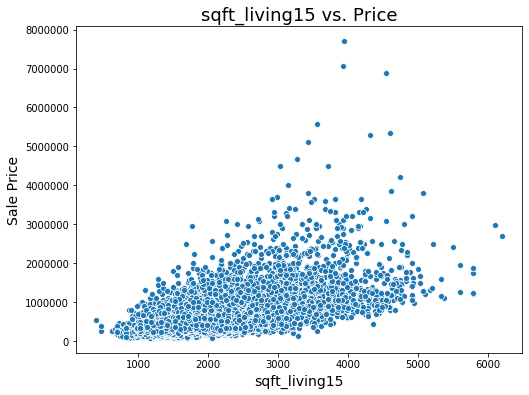

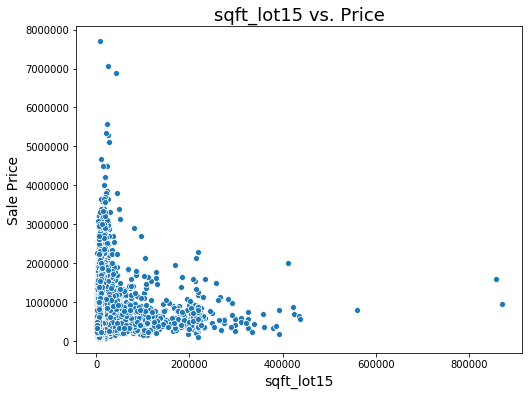

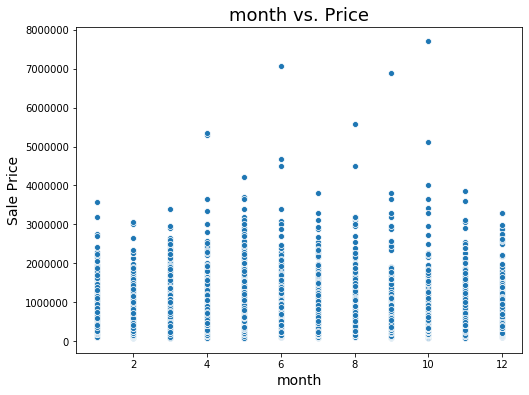

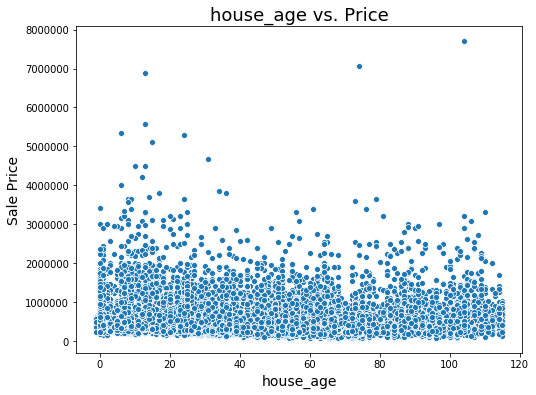

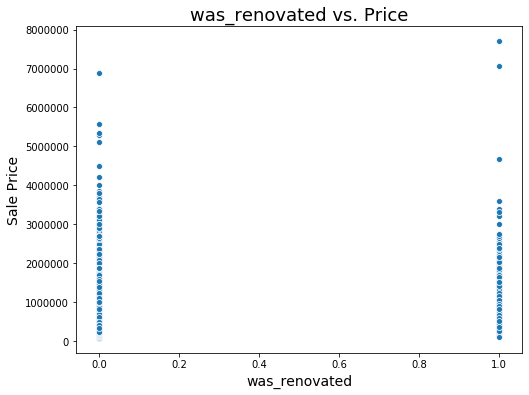

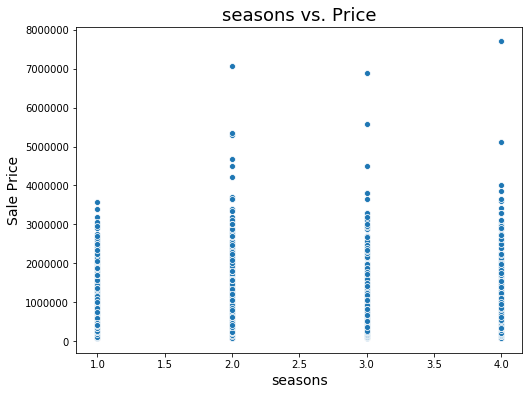

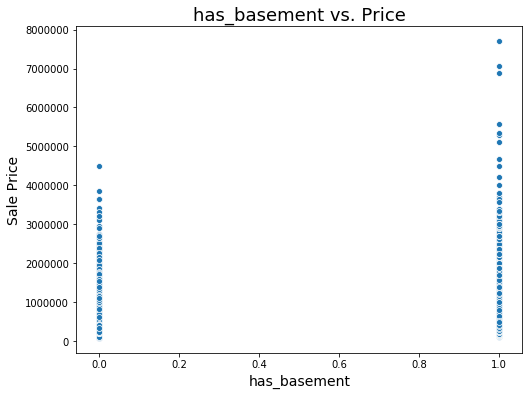

In [48]:
# A good method to understand the spread of each variable is through plotting

# Creating a function to make scatter plots
def scatterplot(col):
    ax = plt.figure(figsize = (8,6))
    ax = sns.scatterplot(x = house_data[col], y = house_data['price'])
    ax.set_title('{} vs. Price'.format(col), fontsize = 18)
    ax.set_xlabel('{}'.format(col), fontsize = 14)
    ax.set_ylabel('Sale Price', fontsize = 14);

for col in house_data:

    scatterplot(col)

In [49]:
# Defining the features that might work better as categories
house_data['condition'] = house_data['condition'].astype('category')
house_data['zipcode'] = house_data['zipcode'].astype('category')
house_data['month'] = house_data['month'].astype('category')
house_data['seasons'] = house_data['seasons'].astype('category')
house_data['month'] = house_data['month'].astype('category')

In [50]:
# Defining what is categories
# categories = ['condition', 'zipcode', 'month', 'seasons', 'month']
# for col in categories:
  #  house_data[col] = house_data.astype('category')

In [51]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
price            21597 non-null int64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
condition        21597 non-null category
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null int64
zipcode          21597 non-null category
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
month            21597 non-null category
house_age        21597 non-null int64
was_renovated    21597 non-null int32
seasons          21597 non-null category
has_basement     21597 non-null int64
dtypes: category(4), float64(4), int32(1), int64(11)
memory usage: 2.6 MB


In [52]:
# Plotting Price with the categories:
def categorical_plots(df):
    for col in df.select_dtypes('category'):
        fig, ax = plt.subplots(figsize=(10,6))
        sns.barplot(x=col, y='price', data=df, palette="colorblind")
        ax.set_title(f"{col} vs Price", fontsize=30)
        plt.xticks(rotation=45)
        plt.show()

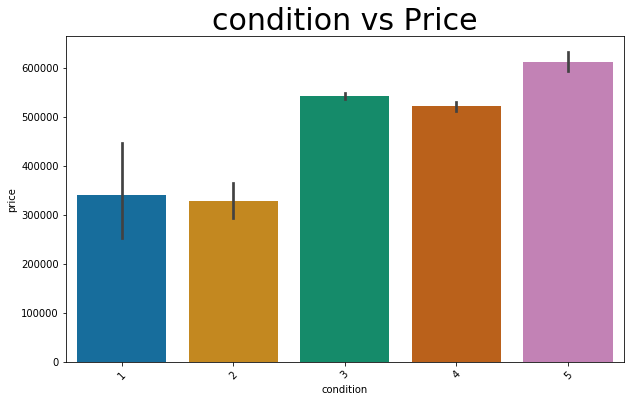

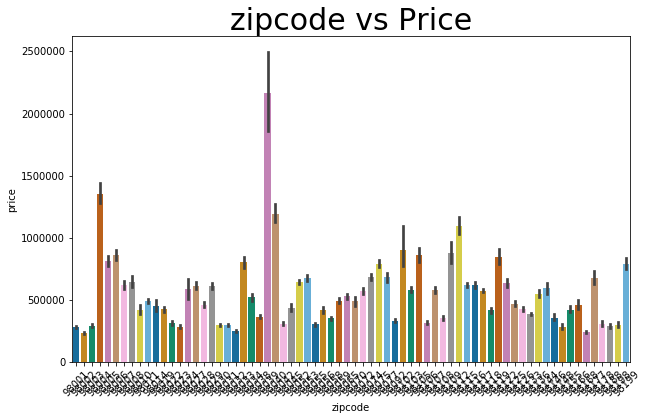

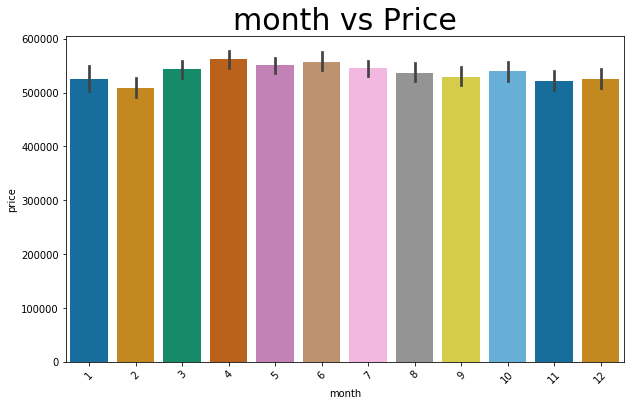

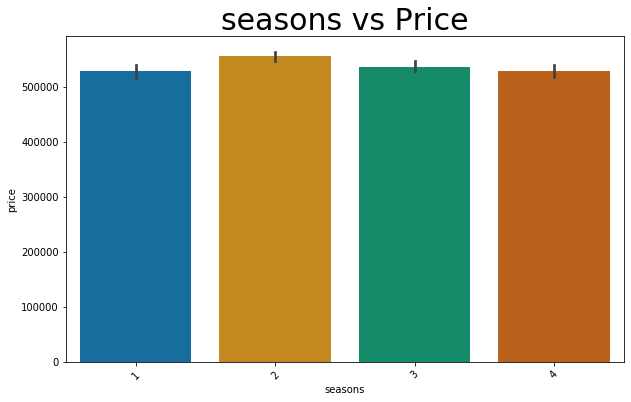

In [53]:
categorical_plots(house_data)

### Multicolinearity

In [54]:
# We will be dropping zipcode, lat, and long from this model as they have to do with location
# which the homeowner cannot change
df1 = house_data.copy()
df1.drop(columns=['lat', 'long', 'zipcode'], inplace=True)

In [55]:
df1.head()

price  bedrooms  bathrooms  ...  was_renovated  seasons  has_basement
0  221900         3      1.000  ...              0        4             0
1  538000         3      2.250  ...              1        4             1
2  180000         2      1.000  ...              0        1             0
3  604000         4      3.000  ...              0        4             1
4  510000         3      2.000  ...              0        1             0

[5 rows x 17 columns]

In [56]:
# Checking for correlation in features before we go to remove outliers
corr1 = df1.iloc[:,2:] 
corr1.corr().abs().style.background_gradient(cmap='coolwarm')

(14, -0.5)

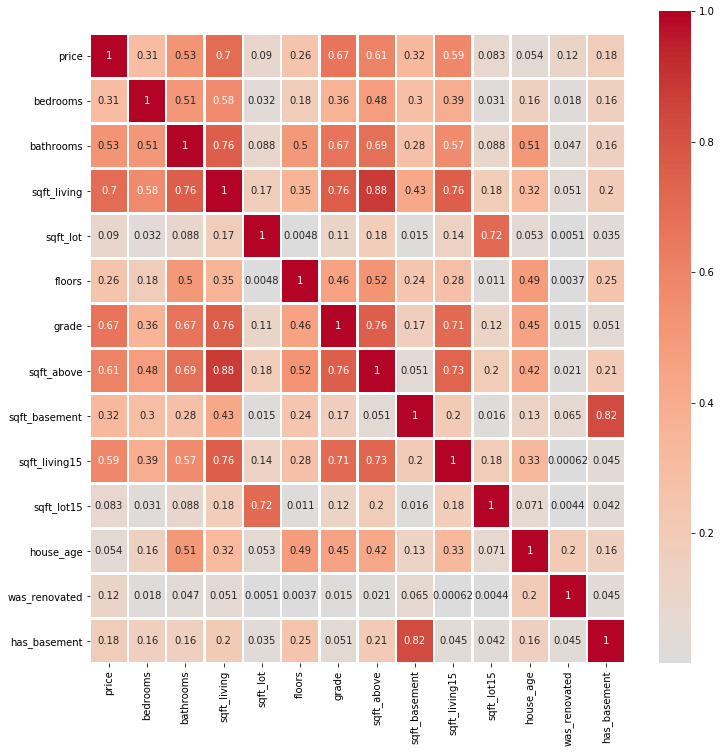

In [57]:
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(df1.corr().abs(), center=0, annot=True, linewidths=1.5, cmap='coolwarm');
ax.set_ylim(len(df1.corr())-0, -0.5)

**To note:
There are some features that have high correlation that will need to be addressed later on**
    

### One Hot Encoding 

In [58]:
# Now that we understand the data better,
# Let's seperate and specify the numerical and categorical data 
# This will allow us to one hot encode it
numerical = [col for col in house_data.columns if house_data[col].dtype == 'object']
categorical = [col for col in house_data.columns if house_data[col].dtype != 'object']

print(categorical)
print(numerical)

['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'month', 'house_age', 'was_renovated', 'seasons', 'has_basement']
[]


In [59]:
# One Hot Encoding
df_dummies = house_data.copy()
df_dummies = pd.get_dummies(house_data, columns = categorical, drop_first = True)
print(df_dummies.shape)
df_dummies.head()

(21597, 31170)


price_80000  price_81000  price_82000  ...  seasons_3  seasons_4  has_basement_1
0            0            0            0  ...          0          1               0
1            0            0            0  ...          0          1               1
2            0            0            0  ...          0          0               0
3            0            0            0  ...          0          1               1
4            0            0            0  ...          0          0               0

[5 rows x 31170 columns]

### Modeling before Addressing Outliers

In [60]:
features = '+'.join(house_data.drop('price', axis = 1).columns)
formula = 'price ~' + features
model1 = smf.ols(formula, house_data).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     716.3
Date:                Tue, 22 Sep 2020   Prob (F-statistic):               0.00
Time:                        15:59:48   Log-Likelihood:            -2.9164e+05
No. Observations:               21597   AIC:                         5.835e+05
Df Residuals:                   21497   BIC:                         5.843e+05
Df Model:                          99                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -3.247e+07   6.79e+06     -4.786      0.000   -4.58e+07   -1.92e+07
condition[T.2]    2.707e+04   3.58e+04      0.756      0.450   -4.31e+04    9.73e+04
condition[T.3]    1.563e+04   3.33e+04      0.470      0.638   -4.96e+04    8.08e+04
condition[T.4]    3.862e+04   3.33e+04      1.161      0.246   -2.66e+04    1.04e+05
condition[T.5]     8.03e+04   3.35e+04      2.399      0.016    1.47e+04    1.46e+05
zipcode[T.98002]  4.565e+04    1.6e+04      2.853      0.004    1.43e+04     7.7e+04
zipcode[T.98003] -2.457e+04   1.43e+04     -1.718      0.086   -5.26e+04    3462.435
zipcode[T.98004]  7.462e+05    2.6e+04     28.701      0.000    6.95e+05    7.97e+05
zipcode[T.98005]   2.75e+05   2.78e+04      9.898      0.000    2.21e+05     3.3e+05
zipcode[T.98006]  2.707e+05   2.27e+04     11.917      0.000    2.26e+05    3.15e+05
zipcode[T.98007]    2.4e+05   2.87e+04      8.369      0.000    1.84e+05    2.96e+05
zipcode[T.98008]  3.002e+05   2.72e+04     11.037      0.000    2.47e+05    3.54e+05
zipcode[T.98010]  1.225e+05   2.44e+04      5.024      0.000    7.47e+04     1.7e+05
zipcode[T.98011]  1.017e+05   3.54e+04      2.872      0.004    3.23e+04    1.71e+05
zipcode[T.98014]  1.831e+05   3.89e+04      4.708      0.000    1.07e+05    2.59e+05
zipcode[T.98019]  1.354e+05   3.84e+04      3.530      0.000    6.02e+04    2.11e+05
zipcode[T.98022]  8.221e+04   2.12e+04      3.883      0.000    4.07e+04    1.24e+05
zipcode[T.98023] -5.542e+04   1.32e+04     -4.211      0.000   -8.12e+04   -2.96e+04
zipcode[T.98024]  2.226e+05   3.42e+04      6.502      0.000    1.55e+05     2.9e+05
zipcode[T.98027]  1.957e+05   2.33e+04      8.392      0.000     1.5e+05    2.41e+05
zipcode[T.98028]  9.717e+04   3.44e+04      2.825      0.005    2.97e+04    1.65e+05
zipcode[T.98029]  2.444e+05   2.66e+04      9.181      0.000    1.92e+05    2.97e+05
zipcode[T.98030]  1.556e+04   1.57e+04      0.989      0.322   -1.53e+04    4.64e+04
zipcode[T.98031]  2.371e+04   1.64e+04      1.447      0.148   -8402.873    5.58e+04
zipcode[T.98032]  2586.4567    1.9e+04      0.136      0.892   -3.47e+04    3.99e+04
zipcode[T.98033]  3.606e+05   2.95e+04     12.219      0.000    3.03e+05    4.18e+05
zipcode[T.98034]  2.058e+05   3.16e+04      6.505      0.000    1.44e+05    2.68e+05
zipcode[T.98038]  7.599e+04   1.77e+04      4.304      0.000    4.14e+04    1.11e+05
zipcode[T.98039]  1.273e+06   3.51e+04     36.245      0.000     1.2e+06    1.34e+06
zipcode[T.98040]  5.142e+05    2.3e+04     22.367      0.000    4.69e+05    5.59e+05
zipcode[T.98042]  3.174e+04    1.5e+04      2.109      0.035    2239.308    6.12e+04
zipcode[T.98045]  2.115e+05   3.26e+04      6.487      0.000    1.48e+05    2.75e+05
zipcode[T.98052]   2.29e+05   3.01e+04      7.601      0.000     1.7e+05    2.88e+05
zipcode[T.98053]  2.089

This already tells us a lot about our initial data. To start we can see that our r-squared value is 0.767 which is very high. The 'Skew' value is 4.919, showing that the data has outliers that need to be addressed. The 'Kurtosis' value is 70.740, also showing heavy tails. Warnings also tell us that there may be issues with strong multicolinearity.

In [61]:
model1.resid.mean()

1.9887647772517563e-06

<Figure size 864x432 with 0 Axes>

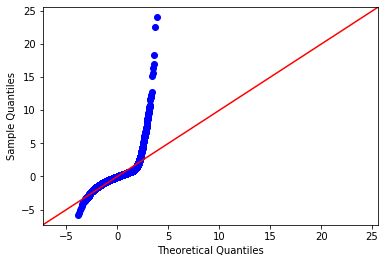

In [62]:
# QQ plot to see if our data is linear
fig1 = plt.figure(figsize = (12,6))
fig1 = sm.graphics.qqplot(model1.resid,fit=True, line='45');

Wow, that's a really bad QQ plot result. Removing outliers will hopefully fix this issue

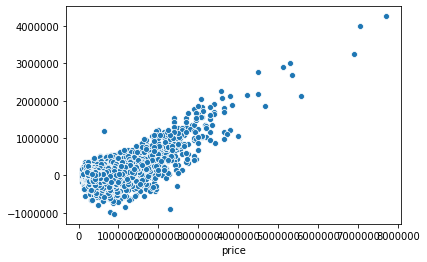

In [63]:
# I have a feeling that this scatterplot will show our data is heteroscadastic
# But for good measure will go ahead and make it
sns.scatterplot(house_data['price'], model1.resid, );

This visual clearly shows that we have some outliers in price. Now we will move on to remove them and see the difference.

In [64]:
# Creating a function to make models in the rest of this notebook
# This function includes:
# Running diagnostics
# Making a train test split
# Plotting the qq plot of residuals in order to see normality
# Plot for homoscedasticity check of residuals
# Plotting a scatterplot of the predicted vs actual test data prices 
# to visually inspect how different they are
# Creating a plot of the first 100 entries of predicted vs actual prices
# Generating the r2 to compare test vs actual

def make_model(df, target='price', test_size=0.25, cv=20):
    X = df.drop([target], axis=1)
    y = df[[target]]
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                        test_size=test_size, 
                                                        random_state=123)
    df_train = pd.concat([y_train, X_train], axis=1)
    df_test = pd.concat([y_test, X_test], axis=1)
    cat_cols = df_train.select_dtypes('category').columns
    features = '+'.join(df_train.drop(columns=target).columns)
    for col in cat_cols:
        features = features.replace(col,f'C({col})') 
    formula = target + '~' + features
    model = smf.ols(formula, df_train).fit()
    fig, axes = plt.subplots(ncols=2, figsize=(20, 5))
    sm.graphics.qqplot(model.resid, fit=True, line='45', ax=axes[0])
    axes[0].set_title('QQ Plot Normality Check', fontsize=20)
    ax=axes[1]
    ax.scatter(df_train['price'], model.resid)
    ax.axhline(0, color='purple')
    axes[1].set_title('Homoscedasticity', fontsize=20)
    plt.show();
    y_predicted = model.predict(X_test)
    plt.figure(figsize=(20,5))   
    
    g = sns.scatterplot(range(len(y_predicted[:200])), y_predicted[:200], 
                        label='Predicted Prices')
    g = sns.scatterplot(range(len(y_test[:200])), y_test.price[:200], 
                        label='Actual Prices')
    plt.title('Comparison of predicted vs actual price', 
              fontdict={'fontsize':20})
    plt.xlabel('Values')
    plt.ylabel('Prices')
    plt.legend()
    plt.show();
    
    r2_test = r2_score(y_test, y_predicted)
    print('Model test data R2 score:', r2_test)
    cv_result = np.mean(cross_val_score(linreg, X, y, cv=cv, 
                                        scoring='neg_mean_squared_error'))
    print('K-fold cross validation negative MSE:', cv_result)
    display(model.summary())
    return model

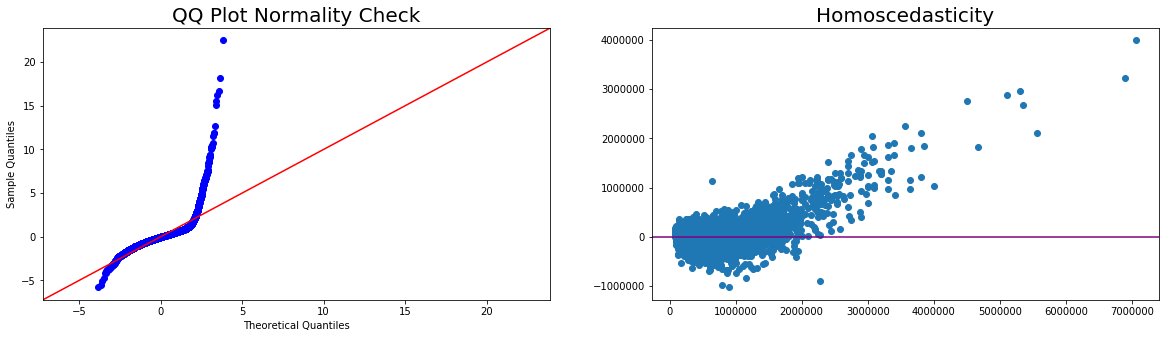

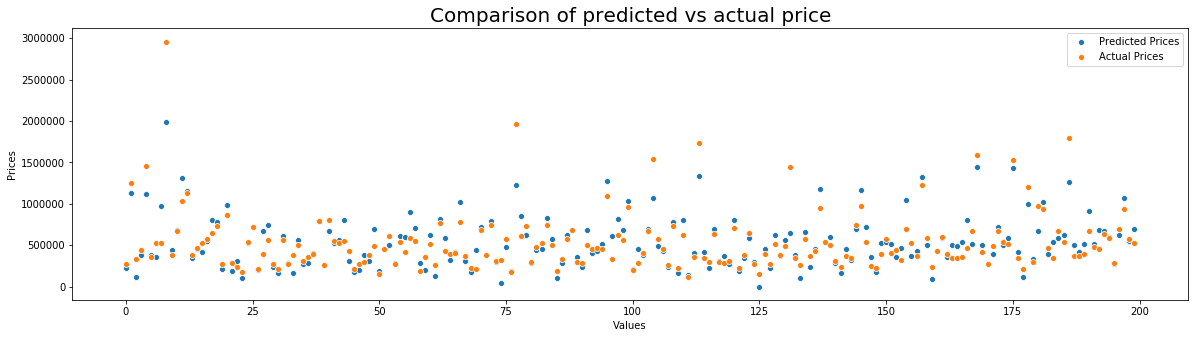

Model test data R2 score: 0.7651122332611704
K-fold cross validation negative MSE: -45770229268.026505


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     536.5
Date:                Tue, 22 Sep 2020   Prob (F-statistic):               0.00
Time:                        15:59:51   Log-Likelihood:            -2.1877e+05
No. Observations:               16197   AIC:                         4.377e+05
Df Residuals:                   16097   BIC:                         4.385e+05
Df Model:                          99                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -3.283e+07   7.86e+06     -4.176      0.000   -4.82e+07   -1.74e+07
C(condition)[T.2]    2.909e+04   4.01e+04      0.726      0.468   -4.94e+04    1.08e+05
C(condition)[T.3]    1.051e+04   3.67e+04      0.286      0.775   -6.15e+04    8.25e+04
C(condition)[T.4]    3.547e+04   3.67e+04      0.966      0.334   -3.65e+04    1.07e+05
C(condition)[T.5]    7.547e+04    3.7e+04      2.041      0.041    2992.811    1.48e+05
C(zipcode)[T.98002]  4.232e+04   1.85e+04      2.286      0.022    6025.260    7.86e+04
C(zipcode)[T.98003]  -2.76e+04   1.64e+04     -1.687      0.092   -5.97e+04    4467.903
C(zipcode)[T.98004]  7.475e+05   3.01e+04     24.821      0.000    6.88e+05    8.06e+05
C(zipcode)[T.98005]  2.709e+05   3.22e+04      8.410      0.000    2.08e+05    3.34e+05
C(zipcode)[T.98006]  2.625e+05   2.63e+04      9.976      0.000    2.11e+05    3.14e+05
C(zipcode)[T.98007]  2.417e+05   3.28e+04      7.359      0.000    1.77e+05    3.06e+05
C(zipcode)[T.98008]  2.955e+05   3.13e+04      9.453      0.000    2.34e+05    3.57e+05
C(zipcode)[T.98010]  1.204e+05   2.76e+04      4.365      0.000    6.63e+04    1.75e+05
C(zipcode)[T.98011]  9.714e+04    4.1e+04      2.371      0.018    1.68e+04    1.77e+05
C(zipcode)[T.98014]  1.891e+05   4.51e+04      4.189      0.000    1.01e+05    2.78e+05
C(zipcode)[T.98019]  1.328e+05   4.42e+04      3.001      0.003    4.61e+04    2.19e+05
C(zipcode)[T.98022]  7.962e+04   2.45e+04      3.247      0.001    3.16e+04    1.28e+05
C(zipcode)[T.98023] -6.039e+04   1.54e+04     -3.925      0.000   -9.05e+04   -3.02e+04
C(zipcode)[T.98024]  2.067e+05   3.93e+04      5.257      0.000     1.3e+05    2.84e+05
C(zipcode)[T.98027]  1.896e+05    2.7e+04      7.026      0.000    1.37e+05    2.42e+05
C(zipcode)[T.98028]  9.869e+04   3.99e+04      2.473      0.013    2.05e+04    1.77e+05
C(zipcode)[T.98029]  2.431e+05   3.09e+04      7.870      0.000    1.83e+05    3.04e+05
C(zipcode)[T.98030]  5978.6139   1.86e+04      0.321      0.748   -3.05e+04    4.24e+04
C(zipcode)[T.98031]  1.693e+04   1.86e+04      0.912      0.362   -1.94e+04    5.33e+04
C(zipcode)[T.98032]  2463.4769    2.2e+04      0.112      0.911   -4.06e+04    4.55e+04
C(zipcode)[T.98033]  3.654e+05   3.42e+04     10.674      0.000    2.98e+05    4.32e+05
C(zipcode)[T.98034]  2.059e+05   3.66e+04      5.632      0.000    1.34e+05    2.78e+05
C(zipcode)[T.98038]  7.469e+04   2.05e+04      3.649      0.000    3.46e+04    1.15e+05
C(zipcode)[T.98039]  1.279e+06      4e+04     31.951      0.000     1.2e+06    1.36e+06
C(zipcode)[T.98040]  5.346e+05   2.67e+04     19.986      0.000    4.82e+05    5.87e+05
C(zipcode)[T.98042]  3.294e+04   1.74e+04      1.893      0.058   -1158.998     6.7e+04
C(zipcode)[T.98045]  2.133e+05   3.75e+04      5.681      0.000     1.4e+05    2.87e+05
C(z

In [65]:
functionmodel1 = make_model(house_data)

# Data Cleaning

### Log Transformation

In [66]:
# Function for log transformation
for feat in numerical:
    house_data[feat] = house_data[feat].map(lambda x: np.log(x))

house_data.head()

price  bedrooms  bathrooms  ...  was_renovated  seasons  has_basement
0  221900         3      1.000  ...              0        4             0
1  538000         3      2.250  ...              1        4             1
2  180000         2      1.000  ...              0        1             0
3  604000         4      3.000  ...              0        4             1
4  510000         3      2.000  ...              0        1             0

[5 rows x 20 columns]

### Outlier Removal

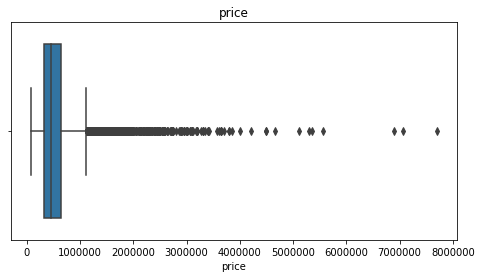

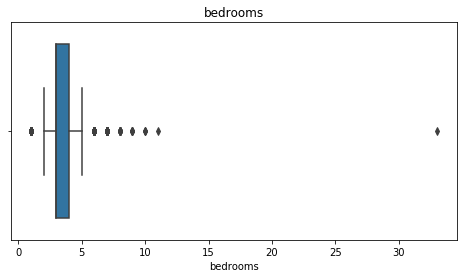

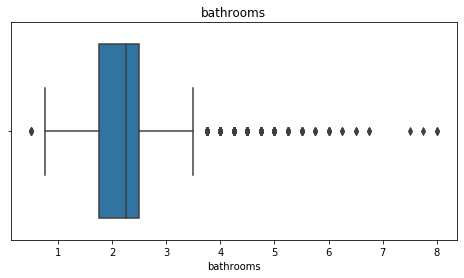

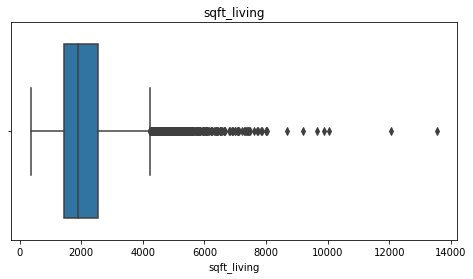

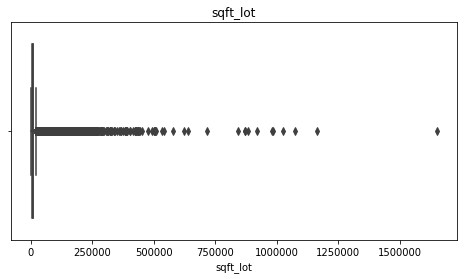

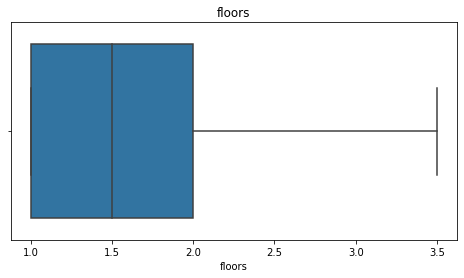

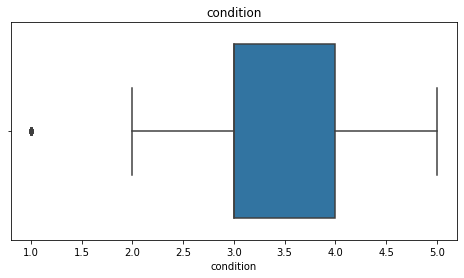

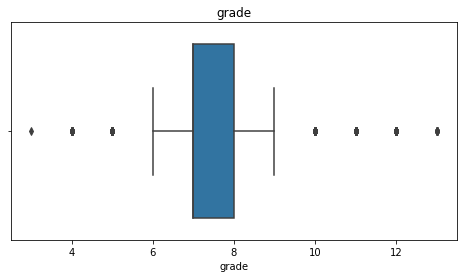

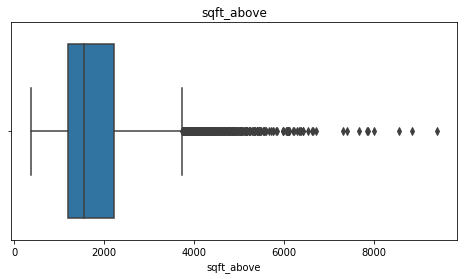

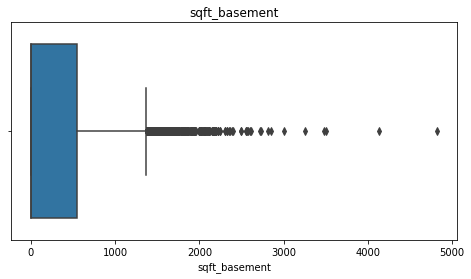

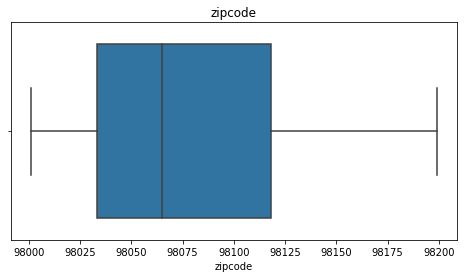

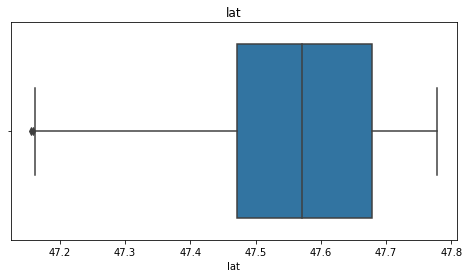

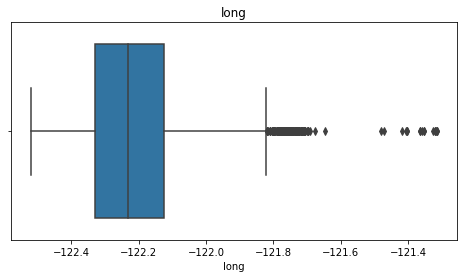

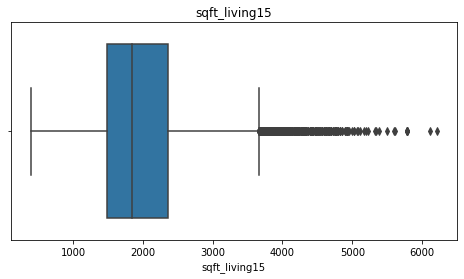

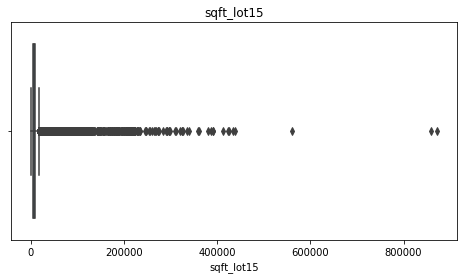

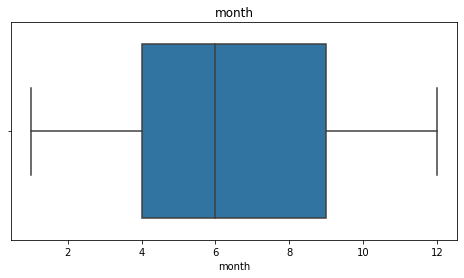

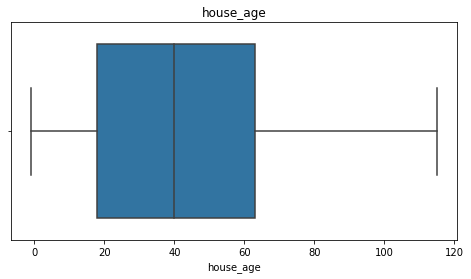

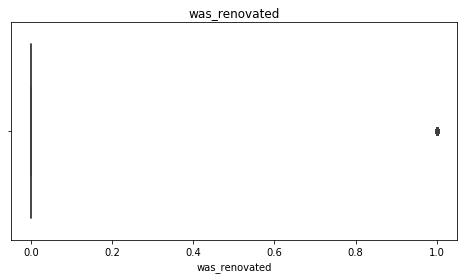

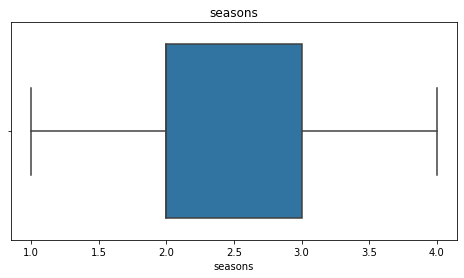

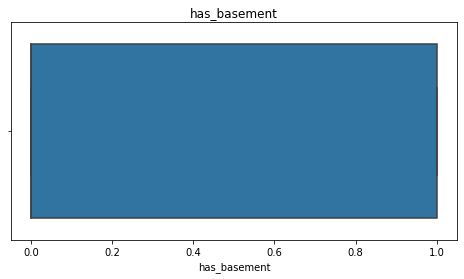

In [67]:
# Let's start by making some boxplots to see if there are obvious outliers
for column in house_data.columns:
    plt.figure(figsize = (8,4))
    sns.boxplot(house_data[column])
    plt.title('{}'.format(column))
    plt.show()

In [68]:
# After researching outlier removal 
# and exploring our data it is best to do IQR type outlier removal methods

def outliersiqr(data):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    threshold = iqr * 1.5
    outliers = (data < q1 - threshold) | (data > q3 + threshold)
    outliers = pd.Series(outliers, index=data.index)
    return outliers

In [69]:
# Function to make an outlier column which we will then remove outliers from
def outlierscolumn(df, columns, verbose=True):
    new_df = df.copy()
    for col in columns:
        outliers = outliersiqr(new_df[col])
        if verbose:
            print(f'{outliers.sum()} outliers found in {col}')
        new_df[f'{col}_outliers'] = outliers
    return new_df

In [70]:
# Feeding in the numerical columns for identifying outliers
num_cols = list(house_data.select_dtypes('number').columns)

# Saving the new dataframe with outlier columns added
df2 = outlierscolumn(house_data, num_cols)

1158 outliers found in price
530 outliers found in bedrooms
561 outliers found in bathrooms
571 outliers found in sqft_living
2419 outliers found in sqft_lot
0 outliers found in floors
1905 outliers found in grade
610 outliers found in sqft_above
560 outliers found in sqft_basement
2 outliers found in lat
255 outliers found in long
543 outliers found in sqft_living15
2188 outliers found in sqft_lot15
0 outliers found in house_age
744 outliers found in was_renovated
0 outliers found in has_basement


In [71]:
df2.head()

price  bedrooms  ...  was_renovated_outliers  has_basement_outliers
0  221900         3  ...                   False                  False
1  538000         3  ...                    True                  False
2  180000         2  ...                   False                  False
3  604000         4  ...                   False                  False
4  510000         3  ...                   False                  False

[5 rows x 36 columns]

In [72]:
df2.shape

(21597, 36)

In [73]:
# Dropping columns that are either continous or boolean (yes or no, has or doesn't have)
# Also removing lat & long (I forgot to remove before)
df2.drop(columns=['was_renovated_outliers', 'lat_outliers', 'long_outliers', 
                        'has_basement_outliers', 'bedrooms_outliers',  
                        'bathrooms_outliers', 'grade_outliers'], inplace=True)

In [74]:
df2.head()

price  bedrooms  ...  sqft_lot15_outliers  house_age_outliers
0  221900         3  ...                False               False
1  538000         3  ...                False               False
2  180000         2  ...                False               False
3  604000         4  ...                False               False
4  510000         3  ...                False               False

[5 rows x 29 columns]

In [75]:
# Creating a list of the outlier columns
outliercols = []
for col in df2.columns:
    if 'outliers' in col:
        outliercols.append(col)
outliercols

['price_outliers',
 'sqft_living_outliers',
 'sqft_lot_outliers',
 'floors_outliers',
 'sqft_above_outliers',
 'sqft_basement_outliers',
 'sqft_living15_outliers',
 'sqft_lot15_outliers',
 'house_age_outliers']

In [76]:
# Filtering the outliers out of my dataframe and returning only the entries
# that are not outliers for any of the features
for col in outliercols:
    df2 = df2[(df2[col]==False)]
df2.shape

(17599, 29)

In [77]:
# Dropping the outlier columns that were added
for col in outliercols:
    df2.drop(columns=[col], axis=1, inplace=True)

In [78]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17599 entries, 0 to 21596
Data columns (total 20 columns):
price            17599 non-null int64
bedrooms         17599 non-null int64
bathrooms        17599 non-null float64
sqft_living      17599 non-null int64
sqft_lot         17599 non-null int64
floors           17599 non-null float64
condition        17599 non-null category
grade            17599 non-null int64
sqft_above       17599 non-null int64
sqft_basement    17599 non-null int64
zipcode          17599 non-null category
lat              17599 non-null float64
long             17599 non-null float64
sqft_living15    17599 non-null int64
sqft_lot15       17599 non-null int64
month            17599 non-null category
house_age        17599 non-null int64
was_renovated    17599 non-null int32
seasons          17599 non-null category
has_basement     17599 non-null int64
dtypes: category(4), float64(4), int32(1), int64(11)
memory usage: 2.3 MB


In [79]:
df2.drop(columns= ['lat', 'long'], inplace=True)

In [80]:
df2.describe()

price  bedrooms  bathrooms  ...  house_age  was_renovated  has_basement
count   17599.000 17599.000  17599.000  ...  17599.000      17599.000     17599.000
mean   457943.390     3.286      2.001  ...     44.551          0.029         0.372
std    196709.667     0.894      0.683  ...     30.045          0.168         0.483
min     78000.000     1.000      0.500  ...     -1.000          0.000         0.000
25%    305000.000     3.000      1.500  ...     17.000          0.000         0.000
50%    420000.000     3.000      2.000  ...     43.000          0.000         0.000
75%    575000.000     4.000      2.500  ...     65.000          0.000         1.000
max   1120000.000    33.000      5.750  ...    115.000          1.000         1.000

[8 rows x 14 columns]

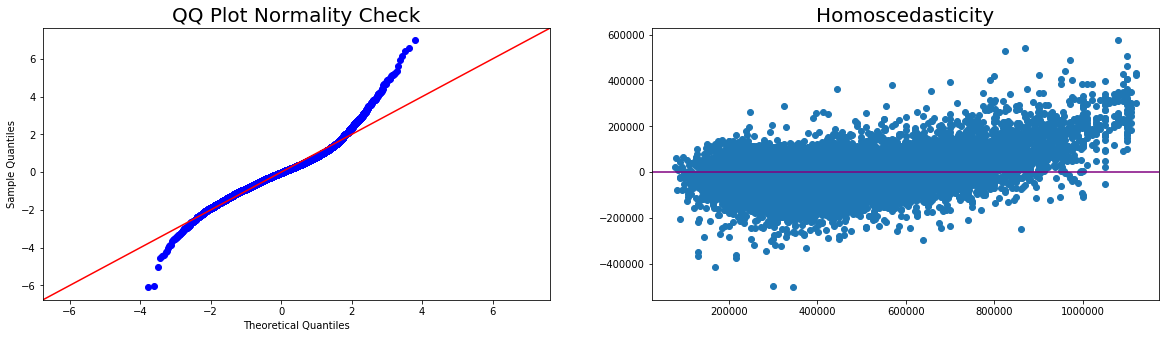

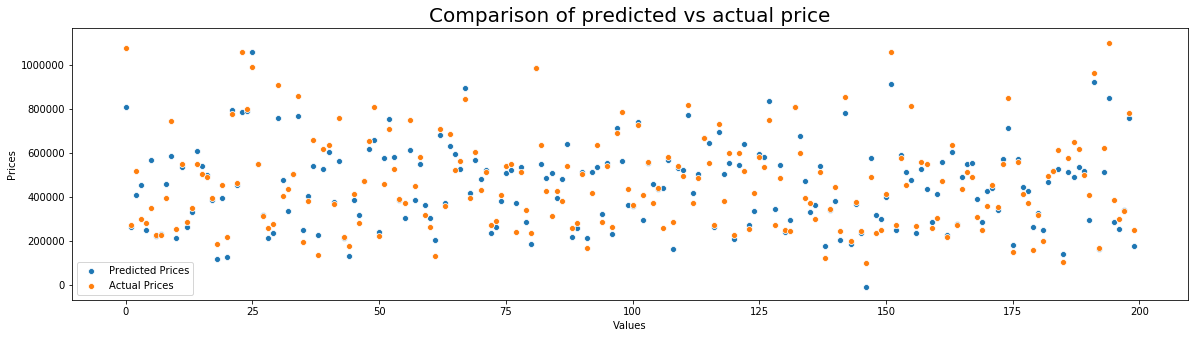

Model test data R2 score: 0.8280152810028104
K-fold cross validation negative MSE: -17159464749.637552


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     638.6
Date:                Tue, 22 Sep 2020   Prob (F-statistic):               0.00
Time:                        15:59:57   Log-Likelihood:            -1.6813e+05
No. Observations:               13199   AIC:                         3.365e+05
Df Residuals:                   13101   BIC:                         3.372e+05
Df Model:                          97                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            -4.51e+05    2.3e+04    -19.641      0.000   -4.96e+05   -4.06e+05
C(condition)[T.2]    5.085e+04   2.19e+04      2.320      0.020    7882.030    9.38e+04
C(condition)[T.3]    7.664e+04   2.03e+04      3.778      0.000    3.69e+04    1.16e+05
C(condition)[T.4]    9.942e+04   2.03e+04      4.897      0.000    5.96e+04    1.39e+05
C(condition)[T.5]    1.319e+05   2.04e+04      6.461      0.000    9.19e+04    1.72e+05
C(zipcode)[T.98002]   1.25e+04   9011.214      1.387      0.165   -5163.494    3.02e+04
C(zipcode)[T.98003]  4389.6075   8306.275      0.528      0.597   -1.19e+04    2.07e+04
C(zipcode)[T.98004]   5.02e+05   9817.239     51.137      0.000    4.83e+05    5.21e+05
C(zipcode)[T.98005]  3.158e+05   1.13e+04     27.847      0.000    2.94e+05    3.38e+05
C(zipcode)[T.98006]  2.654e+05   7919.786     33.512      0.000     2.5e+05    2.81e+05
C(zipcode)[T.98007]   2.45e+05   1.01e+04     24.285      0.000    2.25e+05    2.65e+05
C(zipcode)[T.98008]  2.449e+05   8426.480     29.063      0.000    2.28e+05    2.61e+05
C(zipcode)[T.98010]  1.057e+05    1.6e+04      6.625      0.000    7.45e+04    1.37e+05
C(zipcode)[T.98011]  1.418e+05   9282.196     15.272      0.000    1.24e+05     1.6e+05
C(zipcode)[T.98014]   9.76e+04   1.67e+04      5.839      0.000    6.48e+04     1.3e+05
C(zipcode)[T.98019]  9.476e+04   9963.097      9.511      0.000    7.52e+04    1.14e+05
C(zipcode)[T.98022]  7683.3616   9868.677      0.779      0.436   -1.17e+04     2.7e+04
C(zipcode)[T.98023]   -1.9e+04   7383.695     -2.573      0.010   -3.35e+04   -4524.305
C(zipcode)[T.98024]  1.561e+05   2.09e+04      7.458      0.000    1.15e+05    1.97e+05
C(zipcode)[T.98027]  2.279e+05   8516.084     26.766      0.000    2.11e+05    2.45e+05
C(zipcode)[T.98028]  1.339e+05   8297.464     16.139      0.000    1.18e+05     1.5e+05
C(zipcode)[T.98029]  2.318e+05   8250.434     28.092      0.000    2.16e+05    2.48e+05
C(zipcode)[T.98030]  4511.6814   8521.509      0.529      0.597   -1.22e+04    2.12e+04
C(zipcode)[T.98031]  1.357e+04   8318.368      1.632      0.103   -2732.814    2.99e+04
C(zipcode)[T.98032]   962.9695   1.08e+04      0.089      0.929   -2.02e+04    2.21e+04
C(zipcode)[T.98033]  3.174e+05   7775.069     40.826      0.000    3.02e+05    3.33e+05
C(zipcode)[T.98034]  1.928e+05   7203.856     26.758      0.000    1.79e+05    2.07e+05
C(zipcode)[T.98038]  3.609e+04   7246.743      4.980      0.000    2.19e+04    5.03e+04
C(zipcode)[T.98039]  6.295e+05   3.75e+04     16.795      0.000    5.56e+05    7.03e+05
C(zipcode)[T.98040]  4.117e+05   1.03e+04     39.892      0.000    3.91e+05    4.32e+05
C(zipcode)[T.98042]  7031.1532   7331.081      0.959      0.338   -7338.830    2.14e+04
C(zipcode)[T.98045]  1.053e+05   1.04e+04     10.139      0.000     8.5e+04    1.26e+05
C(z

In [81]:
# Time to make a model to see the difference
functionmodel2 = make_model(df2)

Notes: This is some great improvement from our last model. We can see that the QQ plot is better distributed alone our line of fit. Homodescedasticisity is also better and fits the line better. We can still improve more with other transformations possibly.

Our R-squared value is very low though which means that we are not doing a good job of explaining what features influence the model.

In [82]:
df2.bedrooms.value_counts()

3     8484
4     5221
2     2527
5     1006
1      166
6      162
7       20
8        7
10       2
9        2
11       1
33       1
Name: bedrooms, dtype: int64

In [83]:
# Removing the obvious bedroom outliers here
df2 = df2[(df2['bedrooms']!=33)]

In [84]:
df2.bedrooms.value_counts()

3     8484
4     5221
2     2527
5     1006
1      166
6      162
7       20
8        7
10       2
9        2
11       1
Name: bedrooms, dtype: int64

In [85]:
df2.describe()

price  bedrooms  bathrooms  ...  house_age  was_renovated  has_basement
count   17598.000 17598.000  17598.000  ...  17598.000      17598.000     17598.000
mean   457933.044     3.285      2.001  ...     44.549          0.029         0.372
std    196710.468     0.866      0.683  ...     30.045          0.168         0.483
min     78000.000     1.000      0.500  ...     -1.000          0.000         0.000
25%    305000.000     3.000      1.500  ...     17.000          0.000         0.000
50%    420000.000     3.000      2.000  ...     43.000          0.000         0.000
75%    575000.000     4.000      2.500  ...     65.000          0.000         1.000
max   1120000.000    11.000      5.750  ...    115.000          1.000         1.000

[8 rows x 14 columns]

In [86]:
# Removing the obvious bedroom outliers here
df2 = df2[(df2['bathrooms']!=5.75)]

In [87]:
df2.describe()

price  bedrooms  bathrooms  ...  house_age  was_renovated  has_basement
count   17597.000 17597.000  17597.000  ...  17597.000      17597.000     17597.000
mean   457928.381     3.284      2.001  ...     44.548          0.029         0.372
std    196715.085     0.866      0.683  ...     30.045          0.168         0.483
min     78000.000     1.000      0.500  ...     -1.000          0.000         0.000
25%    305000.000     3.000      1.500  ...     17.000          0.000         0.000
50%    420000.000     3.000      2.000  ...     43.000          0.000         0.000
75%    575000.000     4.000      2.500  ...     65.000          0.000         1.000
max   1120000.000    11.000      5.250  ...    115.000          1.000         1.000

[8 rows x 14 columns]

### Linearity, Normality, & Homoscedasticity

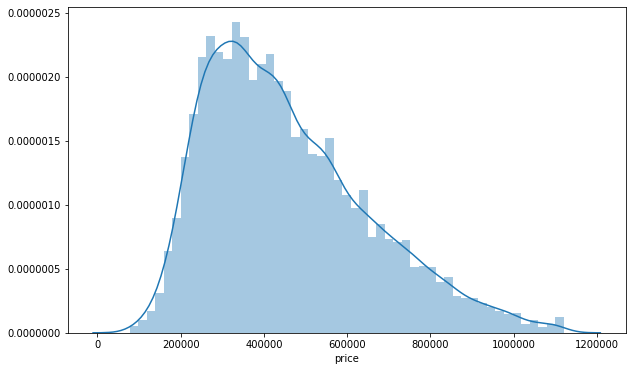

In [88]:
# Let's look at the target price first
fig, ax = plt.subplots(figsize=(10,6))
sns.distplot(df2['price'], bins='auto')

# Adjusting the money ticks 
# fmt_money = '${x:,.0f}'

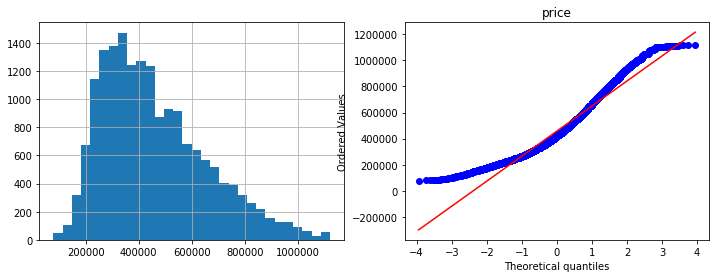

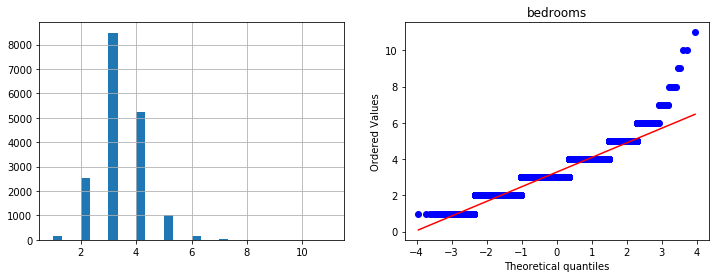

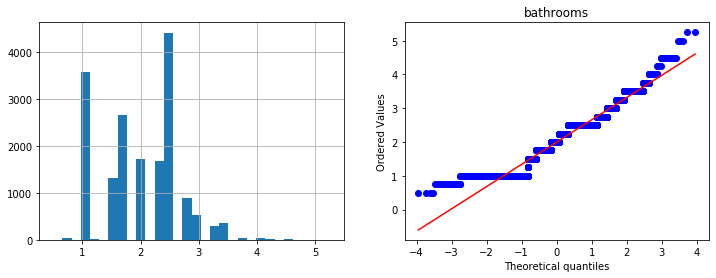

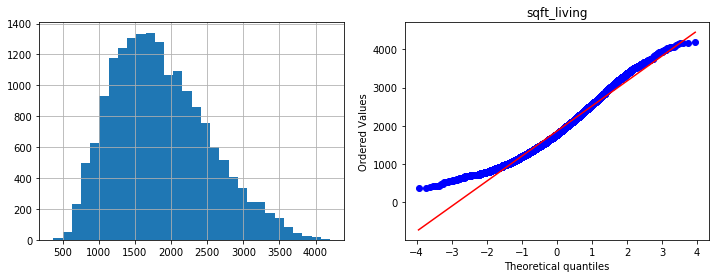

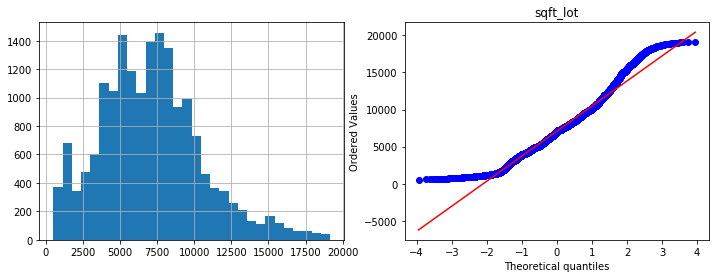

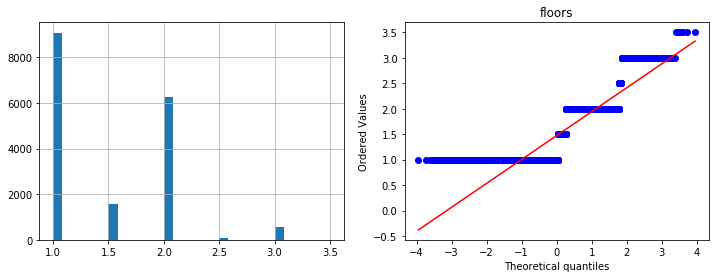

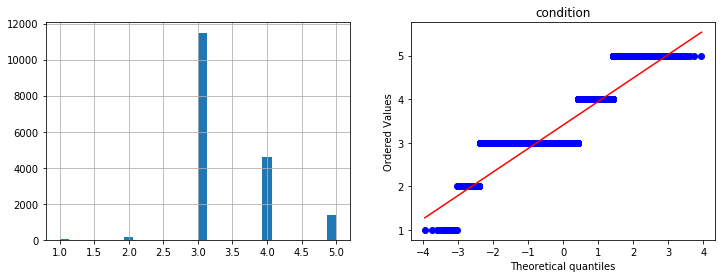

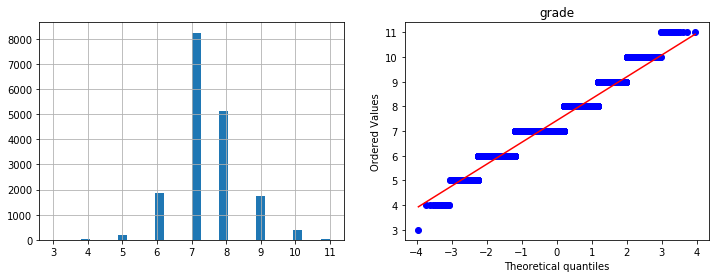

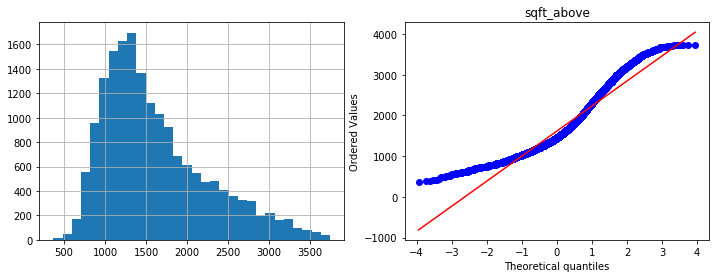

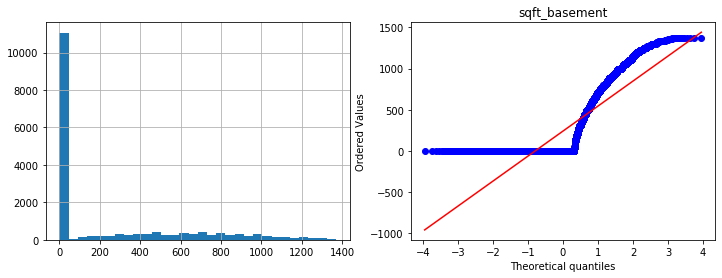

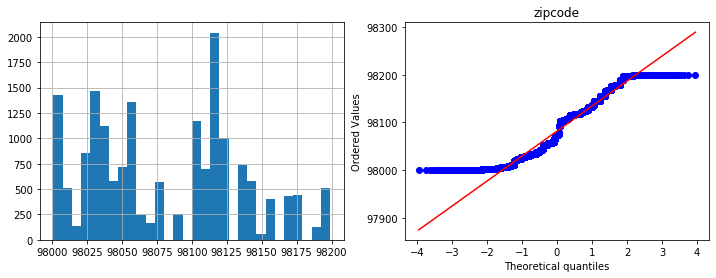

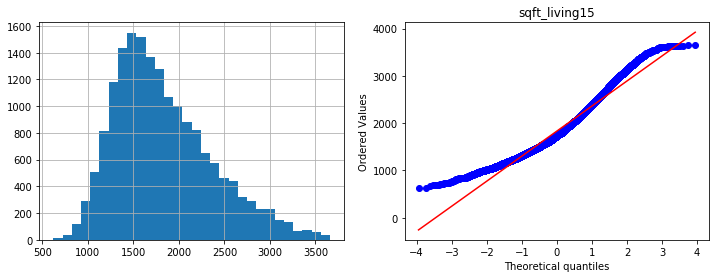

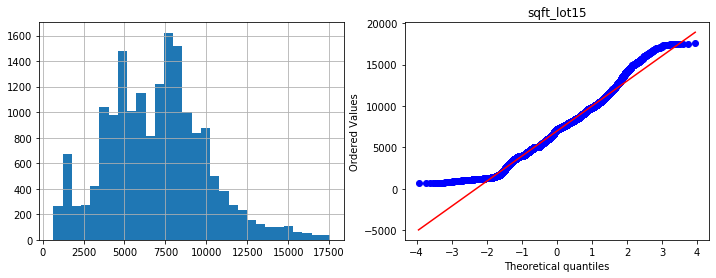

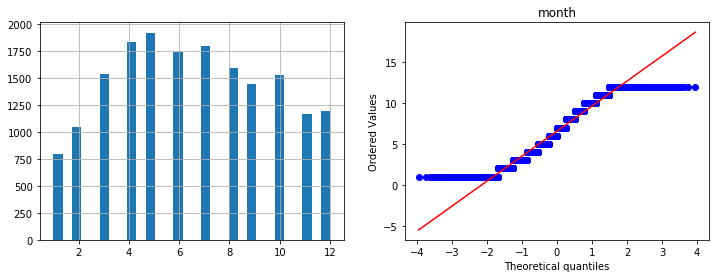

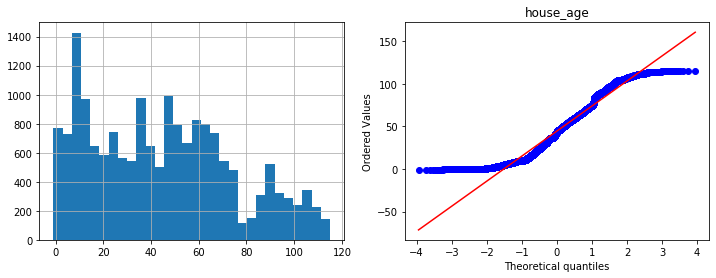

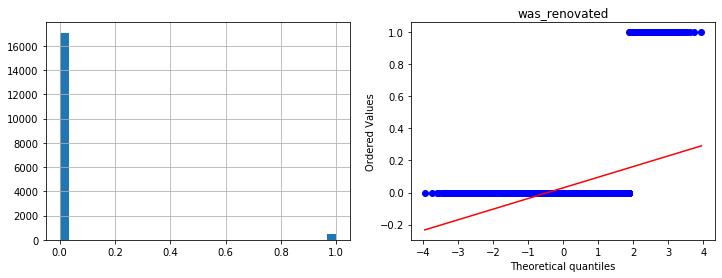

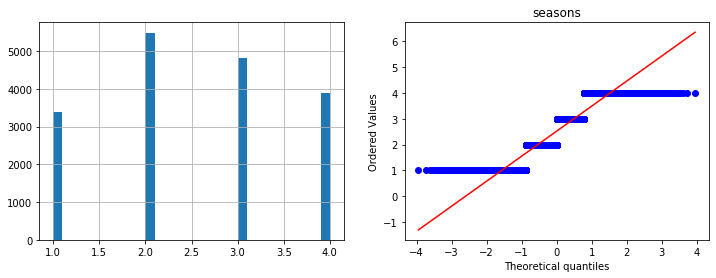

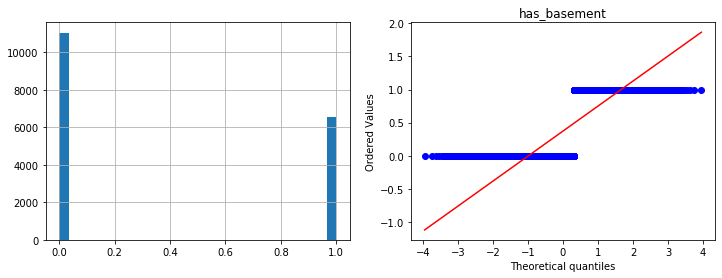

In [89]:
# Function to make vizuals to show normality
def normalityplots (df, column):
    plt.figure(figsize = (12,4))
    plt.subplot(1,2,1)
    df[column].hist(bins = 30)
    plt.subplot(1,2,2)
    stats.probplot(df[column], dist = 'norm', plot = plt)
    plt.title('{}'.format(column))
    plt.show()

# Now let's see the results of the outlier removal
for column in df2.columns:
    normalityplots(df2, column)

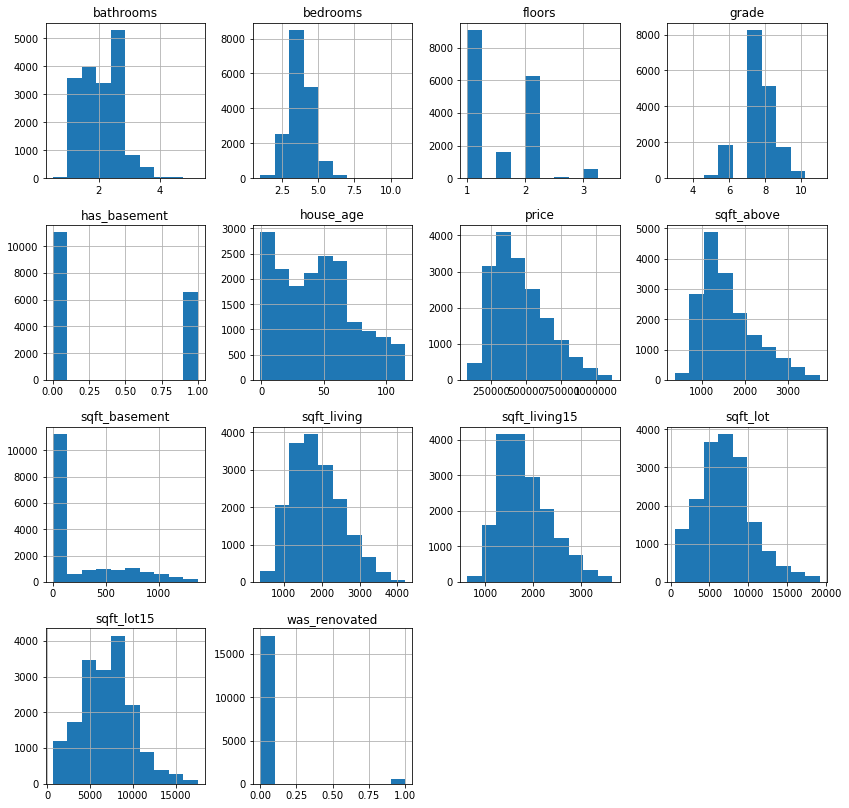

In [90]:
df2.hist(figsize = (14,14));

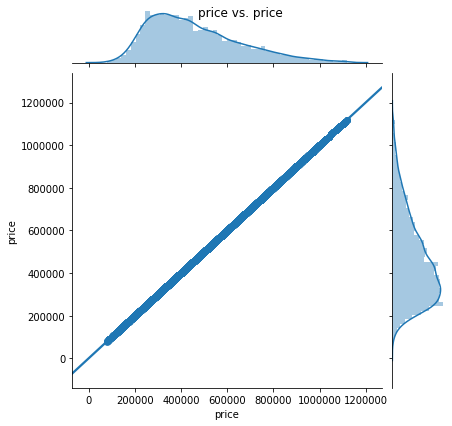

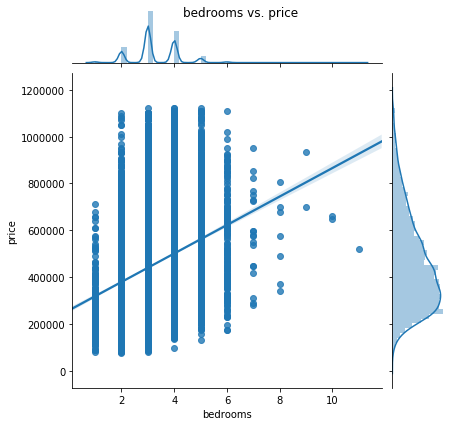

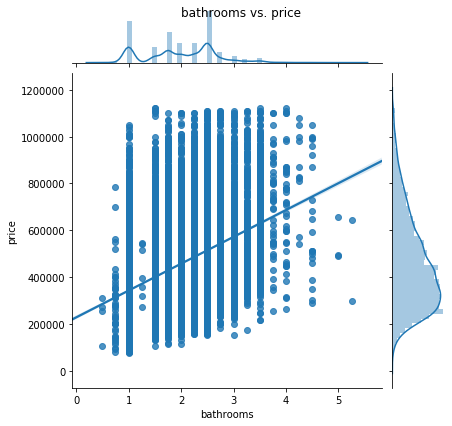

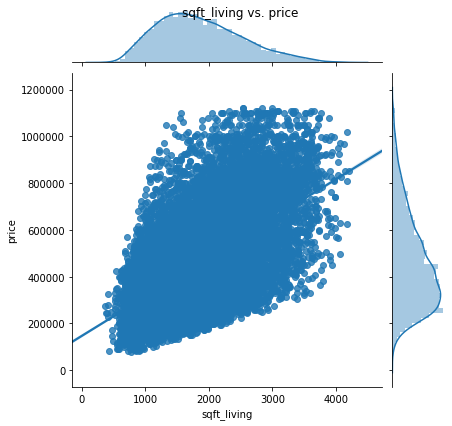

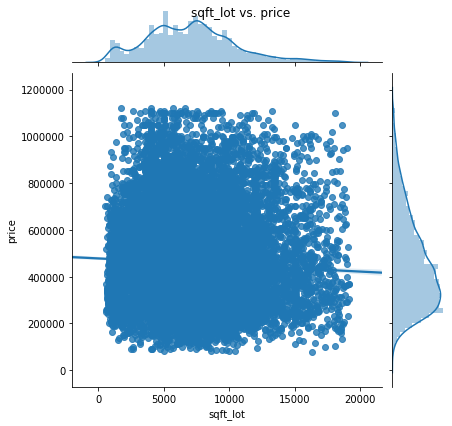

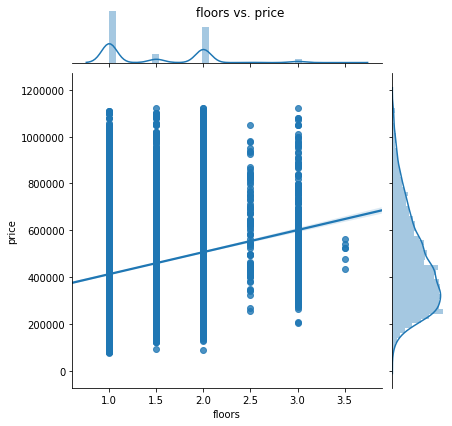

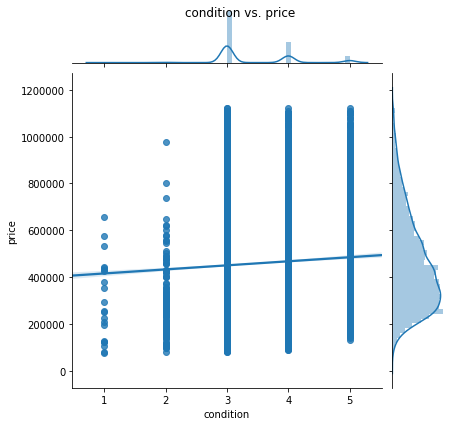

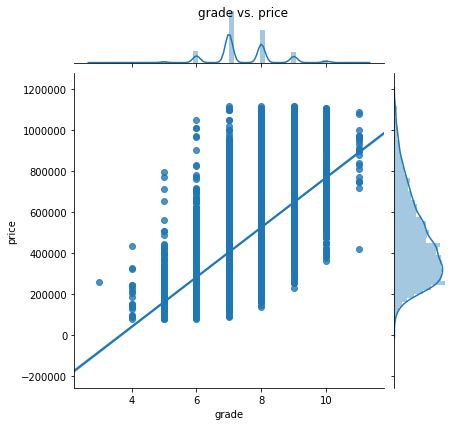

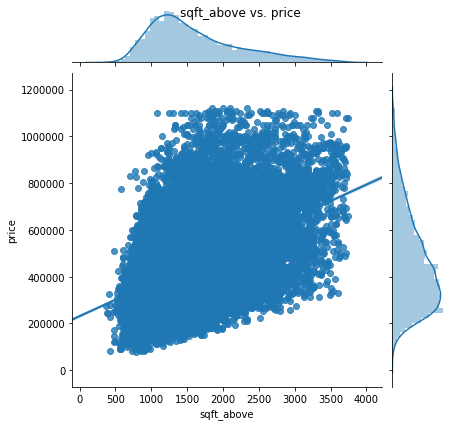

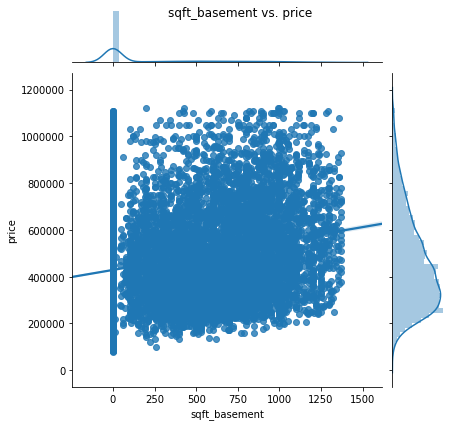

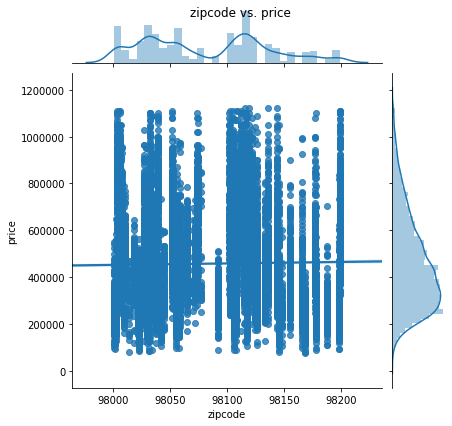

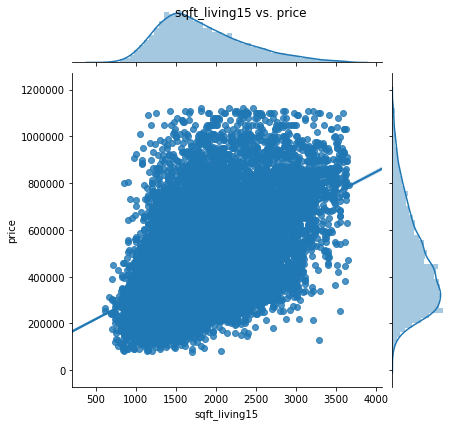

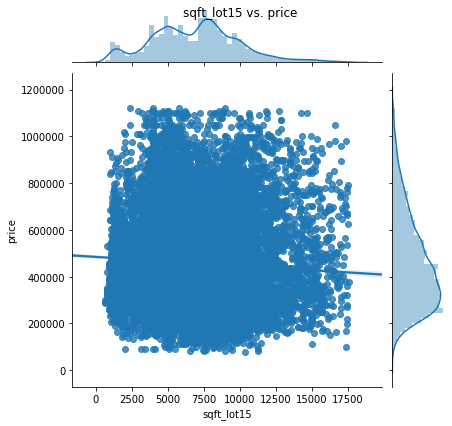

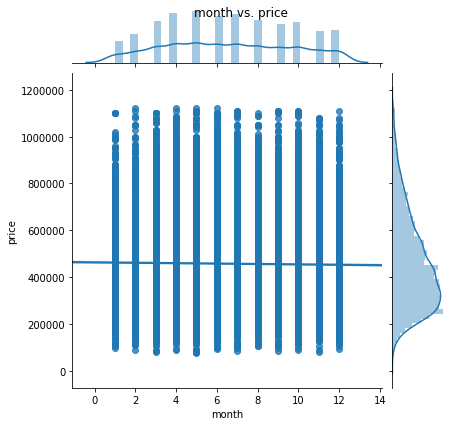

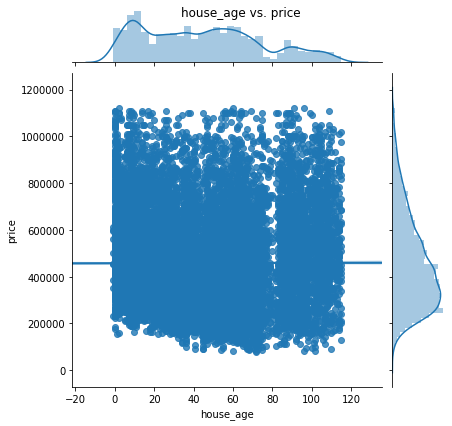

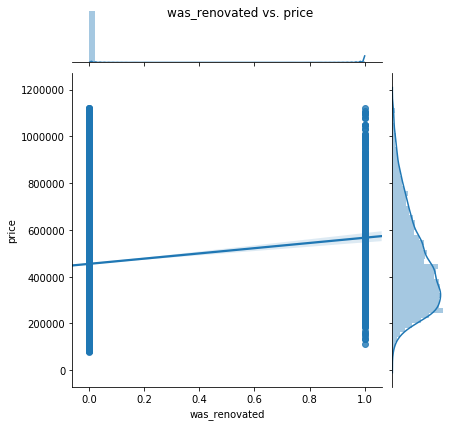

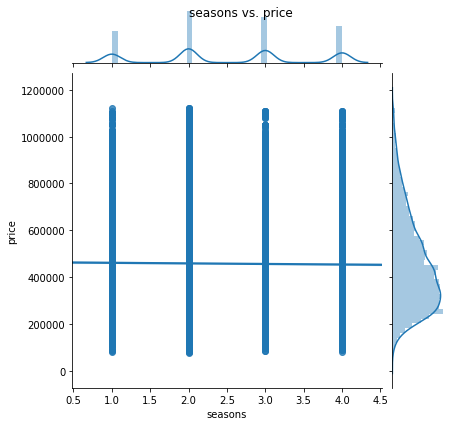

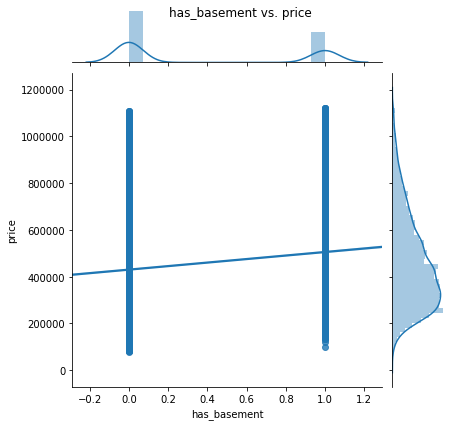

In [91]:
# Creating a function that will create a joint plot to vizualize linearity against our target price
def jointplot(df, col, target = 'price'):
    g = sns.jointplot(data = df, x = col, y = target, kind = 'reg')
    plt.suptitle(f"{col} vs. {target}");
    return g

for col in df2.columns:
    jointplot(df2, col)

Our data and feature columns look a bit more normal now. I will need to drop more columns though before I make a new model as they aren't normally distributed or don't make sense for the model and/or I won't be using it for recommendations of how to improve the house.

In [92]:
df2.drop(columns=['zipcode', 'sqft_lot', 'sqft_lot15', 
                  'sqft_basement'], inplace=True)

In [93]:
df2.head()

price  bedrooms  bathrooms  ...  was_renovated  seasons has_basement
0  221900         3      1.000  ...              0        4            0
1  538000         3      2.250  ...              1        4            1
2  180000         2      1.000  ...              0        1            0
3  604000         4      3.000  ...              0        4            1
4  510000         3      2.000  ...              0        1            0

[5 rows x 14 columns]

Notes:

### Low p-value Removal

In [94]:
# Function to identify the insignificant p-values
def bad_pvalues(model, verbose=True):
    
#     Pulling out the p-values and identifying the ones above .05
    pvalues = model.pvalues
    bad_features = pvalues[pvalues > .05]
    
#     Excluding the intercept in case it has a high p-value
    if 'Intercept' in bad_features:
        bad_features.remove('Intercept')
        
#      Printing a statement of the bad p-values
    if verbose:
        print(f'{len(bad_features)} bad p-values to be reviewed:\n' 
              + f'{bad_features}')
    return bad_features

In [95]:
model2_bad_pvals = bad_pvalues(model1)

21 bad p-values to be reviewed:
condition[T.2]     0.450
condition[T.3]     0.638
condition[T.4]     0.246
zipcode[T.98003]   0.086
zipcode[T.98030]   0.322
zipcode[T.98031]   0.148
zipcode[T.98032]   0.892
zipcode[T.98092]   0.145
zipcode[T.98148]   0.088
zipcode[T.98188]   0.133
month[T.2]         0.436
month[T.7]         0.325
month[T.8]         0.807
month[T.9]         0.305
month[T.10]        0.505
month[T.11]        0.881
month[T.12]        0.744
seasons[T.2]       0.085
seasons[T.3]       0.166
seasons[T.4]       0.341
lat                0.504
dtype: float64


In [96]:
# We can see from the low values that month has many low p-value features
# We will be removing zipcode and month
df3 = df2.copy()
df3.drop(columns=(['month']), inplace=True)
df3.shape

(17597, 13)

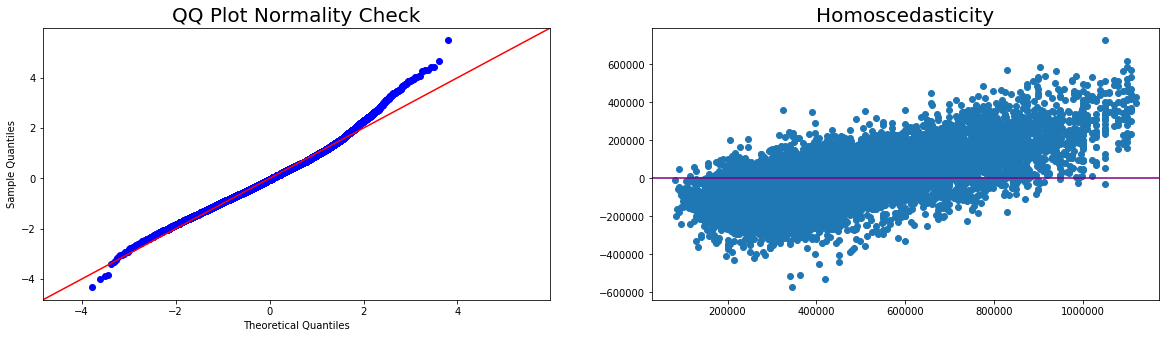

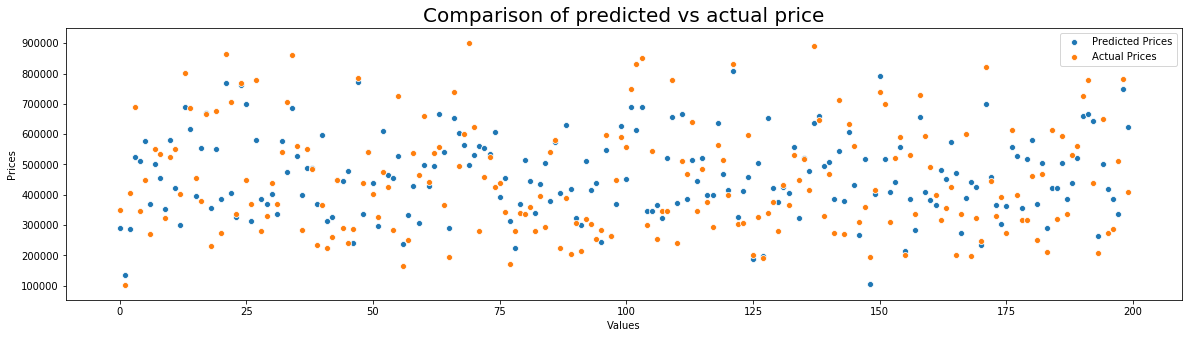

Model test data R2 score: 0.5438627079563865
K-fold cross validation negative MSE: -17688841132.91494


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.546
Model:                            OLS   Adj. R-squared:                  0.546
Method:                 Least Squares   F-statistic:                     934.1
Date:                Tue, 22 Sep 2020   Prob (F-statistic):               0.00
Time:                        16:00:48   Log-Likelihood:            -1.7439e+05
No. Observations:               13197   AIC:                         3.488e+05
Df Residuals:                   13179   BIC:                         3.489e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -7.368e+05   3.88e+04    -18.976      0.000   -8.13e+05   -6.61e+05
C(condition)[T.2] -7725.4231   3.92e+04     -0.197      0.844   -8.46e+04    6.92e+04
C(condition)[T.3]  3.892e+04    3.7e+04      1.053      0.292   -3.35e+04    1.11e+05
C(condition)[T.4]  5.359e+04    3.7e+04      1.450      0.147   -1.89e+04    1.26e+05
C(condition)[T.5]  8.957e+04   3.71e+04      2.413      0.016    1.68e+04    1.62e+05
C(seasons)[T.2]    6438.8007   3353.663      1.920      0.055    -134.861     1.3e+04
C(seasons)[T.3]   -5931.5815   3432.043     -1.728      0.084   -1.27e+04     795.717
C(seasons)[T.4]   -1.156e+04   3608.704     -3.204      0.001   -1.86e+04   -4488.048
bedrooms          -1.648e+04   1757.572     -9.374      0.000   -1.99e+04    -1.3e+04
bathrooms          2.183e+04   2936.110      7.436      0.000    1.61e+04    2.76e+04
sqft_living          59.4232      6.554      9.066      0.000      46.575      72.271
floors             5.852e+04   3061.307     19.117      0.000    5.25e+04    6.45e+04
grade              9.569e+04   1917.728     49.898      0.000    9.19e+04    9.95e+04
sqft_above            2.1608      6.939      0.311      0.755     -11.440      15.761
sqft_living15        59.4445      3.373     17.622      0.000      52.832      66.057
house_age          2804.5305     56.013     50.069      0.000    2694.737    2914.324
was_renovated      2.035e+04   7273.034      2.798      0.005    6091.330    3.46e+04
has_basement       4.334e+04   4602.561      9.416      0.000    3.43e+04    5.24e+04
==============================================================================
Omnibus:                      582.405   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              824.529
Skew:                           0.427   Prob(JB):                    9.03e-180
Kurtosis:                       3.878   Cond. No.                     2.31e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.31e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [97]:
# Model summary to see the changes if significant
functionmodel3 = make_model(df3)

Notes: 

### Multicolinearity Column/Feature Removal

In [98]:
# Creating a heat map again to see our new data
corr3 = df3.iloc[:,2:] 
corr3.corr().abs().style.background_gradient(cmap='Reds')

In [99]:
# There is a high correlation betweeon sqft_above and sqft_living15
# Note even sure what sqftliving15 is exactly so we will be dropping this column

In [100]:
df4 = df3.copy()
df4.drop(columns=['sqft_living15', 'sqft_above'], inplace=True)

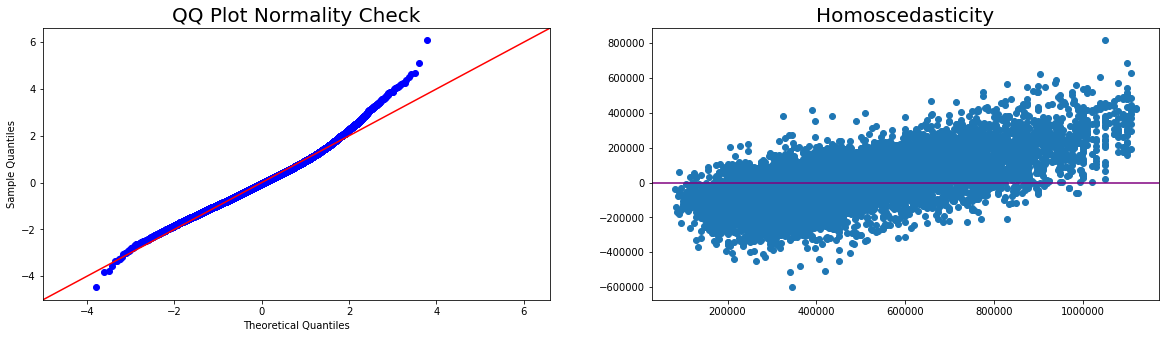

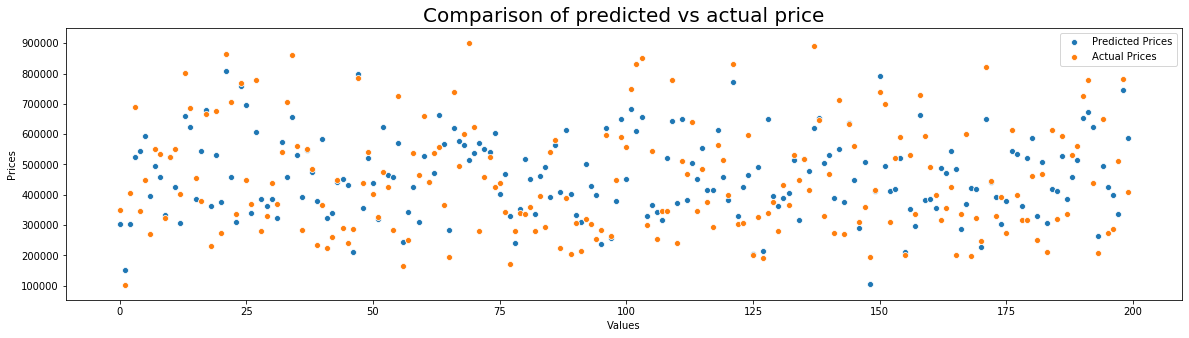

Model test data R2 score: 0.539072780106747
K-fold cross validation negative MSE: -18032867316.69354


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.535
Method:                 Least Squares   F-statistic:                     1013.
Date:                Tue, 22 Sep 2020   Prob (F-statistic):               0.00
Time:                        16:00:51   Log-Likelihood:            -1.7455e+05
No. Observations:               13197   AIC:                         3.491e+05
Df Residuals:                   13181   BIC:                         3.492e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -7.099e+05   3.93e+04    -18.084      0.000   -7.87e+05   -6.33e+05
C(condition)[T.2] -2.562e+04   3.97e+04     -0.646      0.519   -1.03e+05    5.22e+04
C(condition)[T.3]  1.969e+04   3.74e+04      0.527      0.598   -5.36e+04     9.3e+04
C(condition)[T.4]  3.354e+04   3.74e+04      0.897      0.370   -3.97e+04    1.07e+05
C(condition)[T.5]  6.558e+04   3.75e+04      1.747      0.081   -8004.944    1.39e+05
C(seasons)[T.2]    7055.3306   3393.402      2.079      0.038     403.775    1.37e+04
C(seasons)[T.3]   -5114.6156   3472.738     -1.473      0.141   -1.19e+04    1692.451
C(seasons)[T.4]   -1.159e+04   3651.820     -3.174      0.002   -1.87e+04   -4433.526
bedrooms          -1.873e+04   1773.869    -10.562      0.000   -2.22e+04   -1.53e+04
bathrooms          2.177e+04   2963.825      7.347      0.000     1.6e+04    2.76e+04
sqft_living          92.2411      3.169     29.106      0.000      86.029      98.453
floors             5.048e+04   2935.575     17.197      0.000    4.47e+04    5.62e+04
grade               1.05e+05   1856.867     56.572      0.000    1.01e+05    1.09e+05
house_age          2755.5454     56.511     48.762      0.000    2644.776    2866.314
was_renovated      1.229e+04   7345.746      1.673      0.094   -2107.112    2.67e+04
has_basement       3.324e+04   2735.728     12.150      0.000    2.79e+04    3.86e+04
==============================================================================
Omnibus:                      638.686   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              933.020
Skew:                           0.446   Prob(JB):                    2.50e-203
Kurtosis:                       3.949   Cond. No.                     1.41e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [101]:
# Model to see difference
functionmodel4 = make_model(df4)

In [102]:
df4.describe()

price  bedrooms  bathrooms  ...  house_age  was_renovated  has_basement
count   17597.000 17597.000  17597.000  ...  17597.000      17597.000     17597.000
mean   457928.381     3.284      2.001  ...     44.548          0.029         0.372
std    196715.085     0.866      0.683  ...     30.045          0.168         0.483
min     78000.000     1.000      0.500  ...     -1.000          0.000         0.000
25%    305000.000     3.000      1.500  ...     17.000          0.000         0.000
50%    420000.000     3.000      2.000  ...     43.000          0.000         0.000
75%    575000.000     4.000      2.500  ...     65.000          0.000         1.000
max   1120000.000    11.000      5.250  ...    115.000          1.000         1.000

[8 rows x 9 columns]

Notes: This didn't create too much change. Also to note the warning message at the bottom of the screen is still appearing

### Log Transformation Part 2

In [103]:
# Creating a new dataframe for this model iteration
# df5 = df4.copy()

In [104]:
# Log transforming the price column
# df5['price'] = df5['price'].map(lambda x: np.log(x))

In [105]:
# functionmodel5 = make_model(df5)

# Recommendations

Homeowners are able to control the following variables/features of their house. My improving or increasing these features the homeowners can possibly increase the worth of their home when selling.

### Improve the Grade of the House

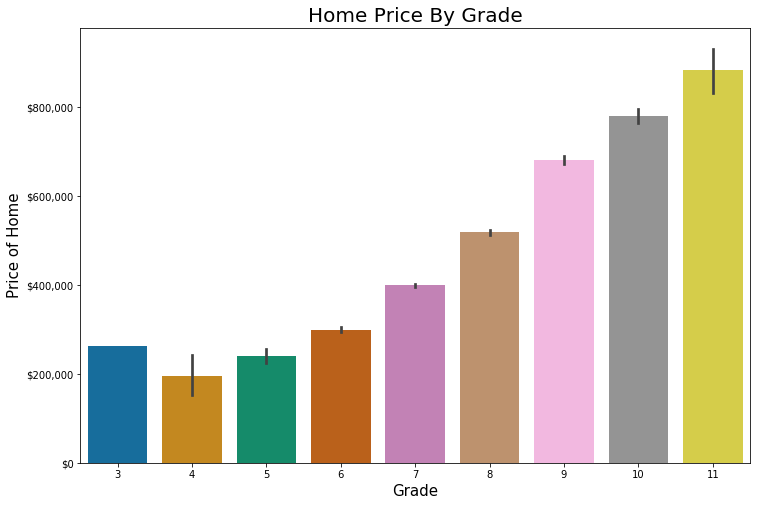

In [106]:
# Setting a figure size and plotting
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(x='grade', y='price', data=df4, palette="colorblind")

# Formatting the y-axis ticks to show as money
fmt_money = '${x:,.0f}'
tick_money = mtick.StrMethodFormatter(fmt_money)
ax.yaxis.set_major_formatter(tick_money)

# Setting title and labels
ax.set_xlabel('Grade', fontsize=15)
ax.set_ylabel('Price of Home', fontsize=15)
ax.set_title('Home Price By Grade', fontsize=20);

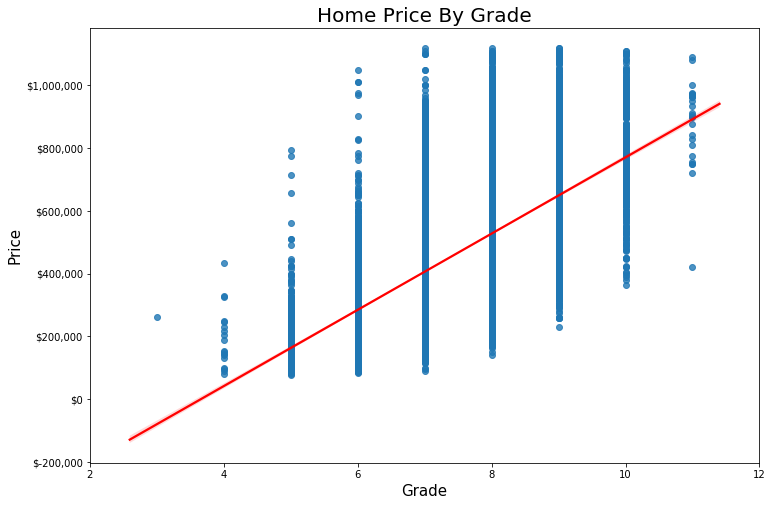

In [107]:
# Regplot

fig, ax = plt.subplots(figsize=(12,8))
sns.regplot(df4['grade'], df4['price'], line_kws={'color':'red'})
fmt_money = '${x:,.0f}'
tick_money = mtick.StrMethodFormatter(fmt_money)
ax.yaxis.set_major_formatter(tick_money)
ax.set(xlim=(2, 12))
ax.set_xlabel('Grade', fontsize=15)
ax.set_ylabel('Price', fontsize=15)
ax.set_title('Home Price By Grade', fontsize=20);

### Increase the Number of Bedrooms

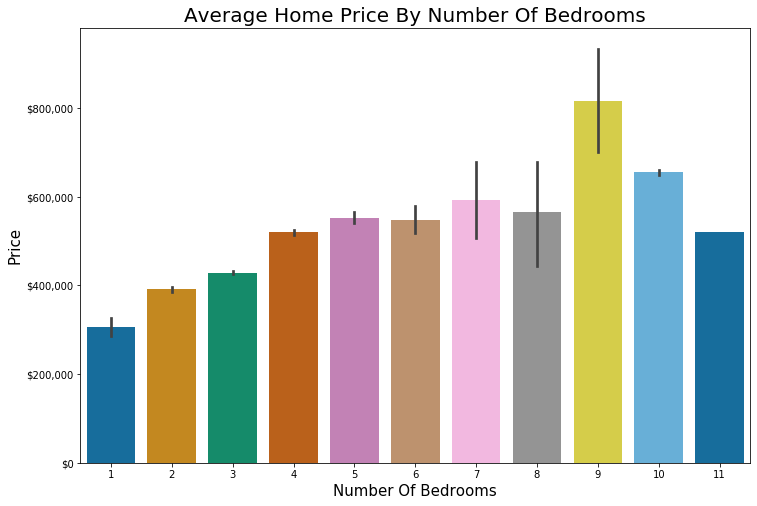

In [108]:
# Setting a figure size and plotting
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(x='bedrooms', y='price', data=df4, palette="colorblind")

# Formatting the y-axis ticks to show as money
fmt_money = '${x:,.0f}'
tick_money = mtick.StrMethodFormatter(fmt_money)
ax.yaxis.set_major_formatter(tick_money)

# Setting title and labels
ax.set_xlabel('Number Of Bedrooms', fontsize=15)
ax.set_ylabel('Price', fontsize=15)
ax.set_title('Average Home Price By Number Of Bedrooms', fontsize=20);

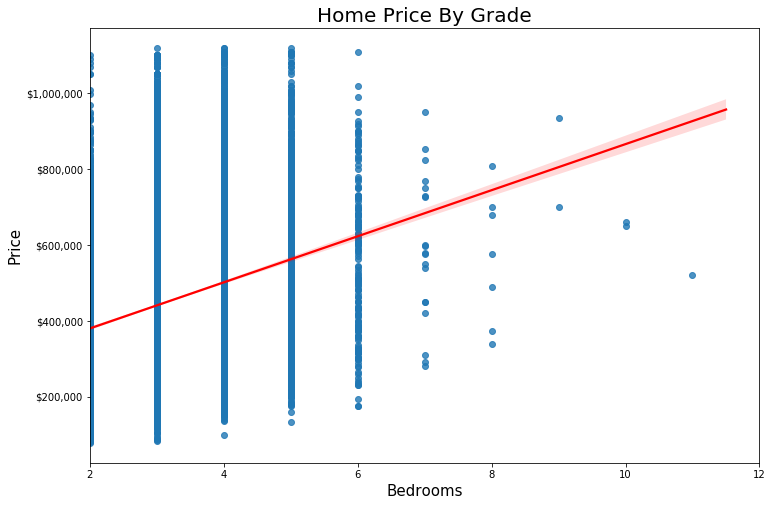

In [109]:
fig, ax = plt.subplots(figsize=(12,8))
sns.regplot(df4['bedrooms'], df4['price'], line_kws={'color':'red'})

# Formatting the y-axis ticks to show as money
fmt_money = '${x:,.0f}'
tick_money = mtick.StrMethodFormatter(fmt_money)
ax.yaxis.set_major_formatter(tick_money)

# Setting the range of the x-ticks
ax.set(xlim=(2, 12))

# Setting title and labels
ax.set_xlabel('Bedrooms', fontsize=15)
ax.set_ylabel('Price', fontsize=15)
ax.set_title('Home Price By Grade', fontsize=20);

### Increase the Number of Bathrooms

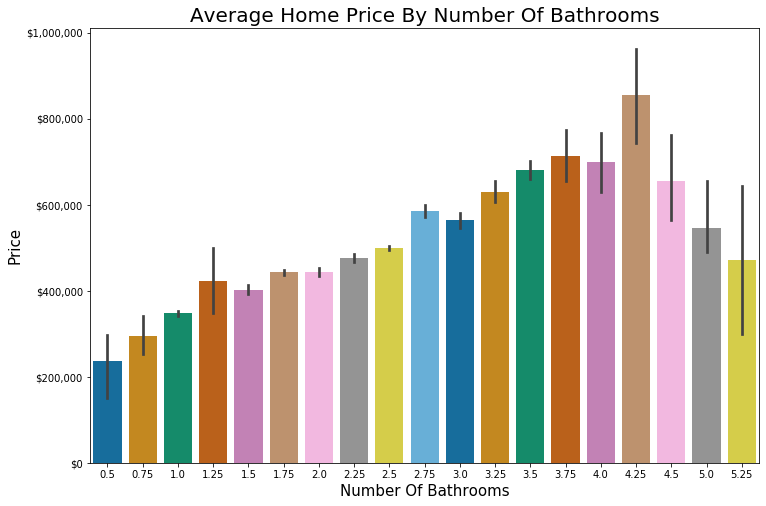

In [110]:
# Setting a figure size and plotting
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(x='bathrooms', y='price', data=df4, palette="colorblind")

# Formatting the y-axis ticks to show as money
fmt_money = '${x:,.0f}'
tick_money = mtick.StrMethodFormatter(fmt_money)
ax.yaxis.set_major_formatter(tick_money)

# Setting title and labels
ax.set_xlabel('Number Of Bathrooms', fontsize=15)
ax.set_ylabel('Price', fontsize=15)
ax.set_title('Average Home Price By Number Of Bathrooms', fontsize=20);

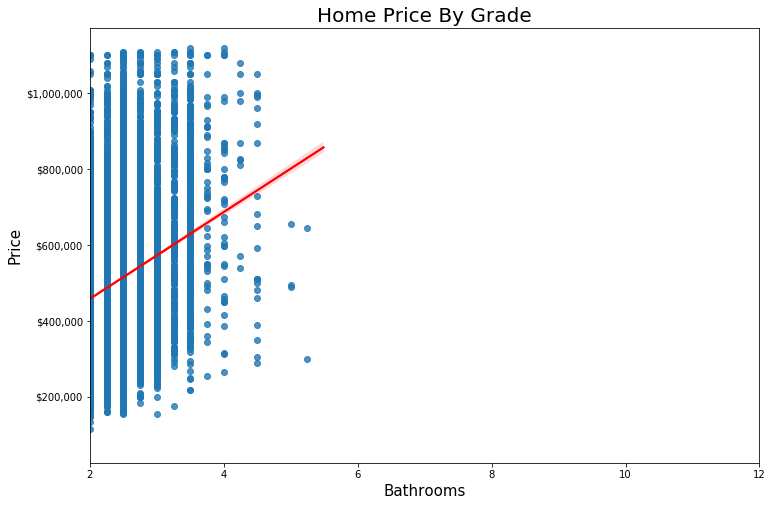

In [111]:
fig, ax = plt.subplots(figsize=(12,8))
sns.regplot(df4['bathrooms'], df4['price'], line_kws={'color':'red'})

# Formatting the y-axis ticks to show as money
fmt_money = '${x:,.0f}'
tick_money = mtick.StrMethodFormatter(fmt_money)
ax.yaxis.set_major_formatter(tick_money)

# Setting the range of the x-ticks
ax.set(xlim=(2, 12))

# Setting title and labels
ax.set_xlabel('Bathrooms', fontsize=15)
ax.set_ylabel('Price', fontsize=15)
ax.set_title('Home Price By Grade', fontsize=20);

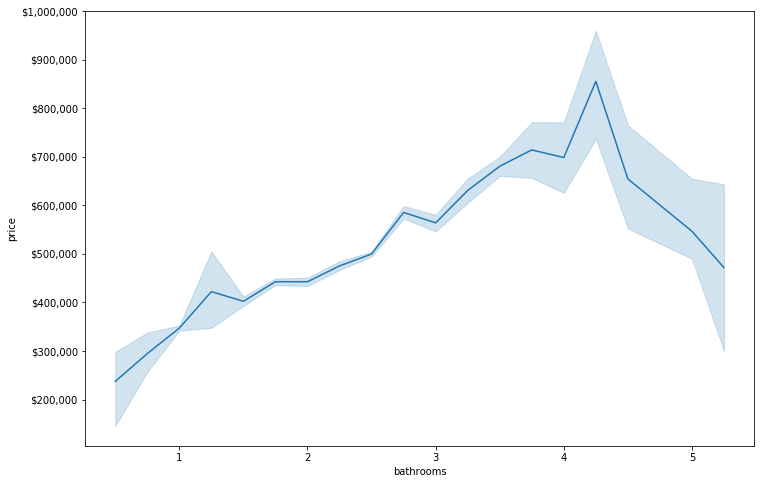

In [112]:
fig, ax = plt.subplots(figsize=(12,8))
sns.lineplot(df4['bathrooms'], df4['price'])

# Formatting the y-axis ticks to show as money
fmt_money = '${x:,.0f}'
tick_money = mtick.StrMethodFormatter(fmt_money)
ax.yaxis.set_major_formatter(tick_money)

### Square Footage of Upper Floors

In [113]:
df4.head()

price  bedrooms  bathrooms  ...  was_renovated  seasons has_basement
0  221900         3      1.000  ...              0        4            0
1  538000         3      2.250  ...              1        4            1
2  180000         2      1.000  ...              0        1            0
3  604000         4      3.000  ...              0        4            1
4  510000         3      2.000  ...              0        1            0

[5 rows x 11 columns]

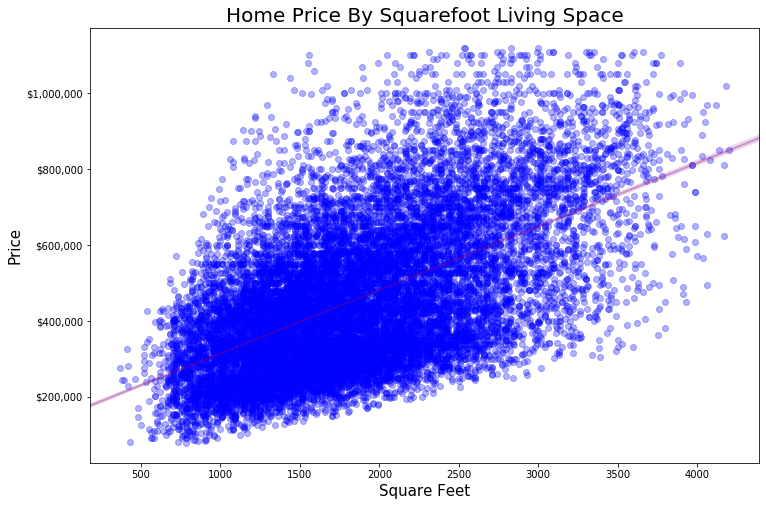

In [114]:
# Regplot for sqft

fig, ax = plt.subplots(figsize=(12,8))
sns.regplot(df4['sqft_living'], df4['price'], 
            scatter_kws = {'color': 'blue', 'alpha': 0.3}, 
            line_kws = {'color': 'purple', 'alpha': 0.3})

# Formatting the y-axis ticks to show as money
fmt_money = '${x:,.0f}'
tick_money = mtick.StrMethodFormatter(fmt_money)
ax.yaxis.set_major_formatter(tick_money)

# Setting title and labels
ax.set_xlabel('Square Feet', fontsize=15)
ax.set_ylabel('Price', fontsize=15)
ax.set_title('Home Price By Squarefoot Living Space', fontsize=20);

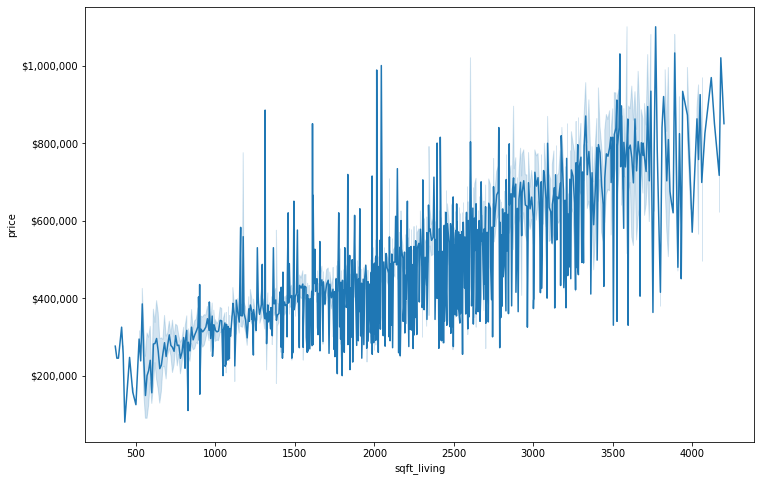

In [115]:
fig, ax = plt.subplots(figsize=(12,8))
sns.lineplot(df4['sqft_living'], df4['price'])

# Formatting the y-axis ticks to show as money
fmt_money = '${x:,.0f}'
tick_money = mtick.StrMethodFormatter(fmt_money)
ax.yaxis.set_major_formatter(tick_money)


Recommendations:
    

### Improve the Condition of the House

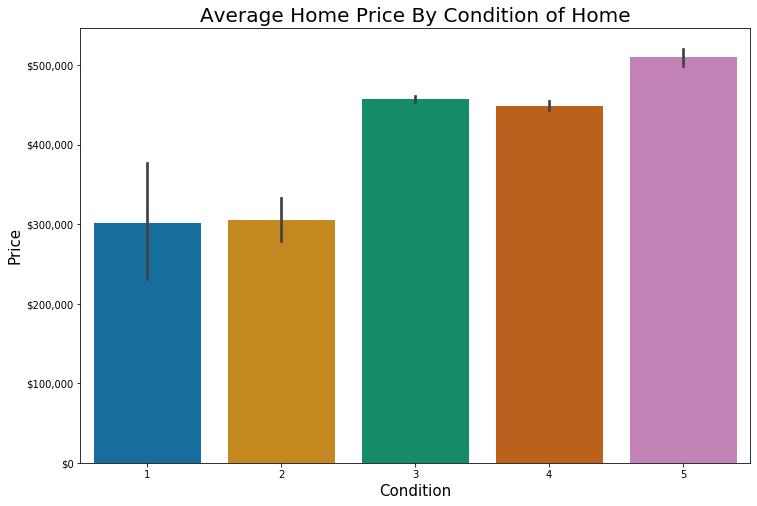

In [117]:
# Setting a figure size and plotting
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(x='condition', y='price', data=df4, palette="colorblind")

# Formatting the y-axis ticks to show as money
fmt_money = '${x:,.0f}'
tick_money = mtick.StrMethodFormatter(fmt_money)
ax.yaxis.set_major_formatter(tick_money)

# Setting title and labels
ax.set_xlabel('Condition', fontsize=15)
ax.set_ylabel('Price', fontsize=15)
ax.set_title('Average Home Price By Condition of Home', fontsize=20);

TypeError: Categorical is not ordered for operation min
you can use .as_ordered() to change the Categorical to an ordered one


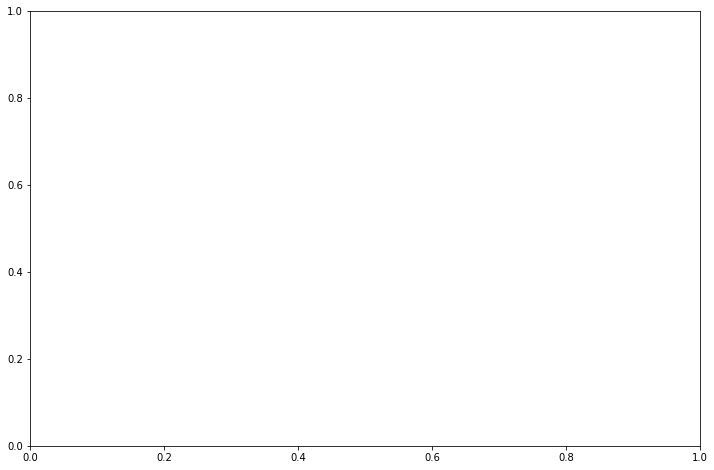

In [118]:
fig, ax = plt.subplots(figsize=(12,8))
sns.regplot(df4['condition'], df4['price'], line_kws={'color':'red'})

# Formatting the y-axis ticks to show as money
fmt_money = '${x:,.0f}'
tick_money = mtick.StrMethodFormatter(fmt_money)
ax.yaxis.set_major_formatter(tick_money)

# Setting the range of the x-ticks
ax.set(xlim=(2, 12))

# Setting title and labels
ax.set_xlabel('Condition', fontsize=15)
ax.set_ylabel('Price', fontsize=15)
ax.set_title('Home Price By Condition of Home', fontsize=20);

### Add a Floor to the Home

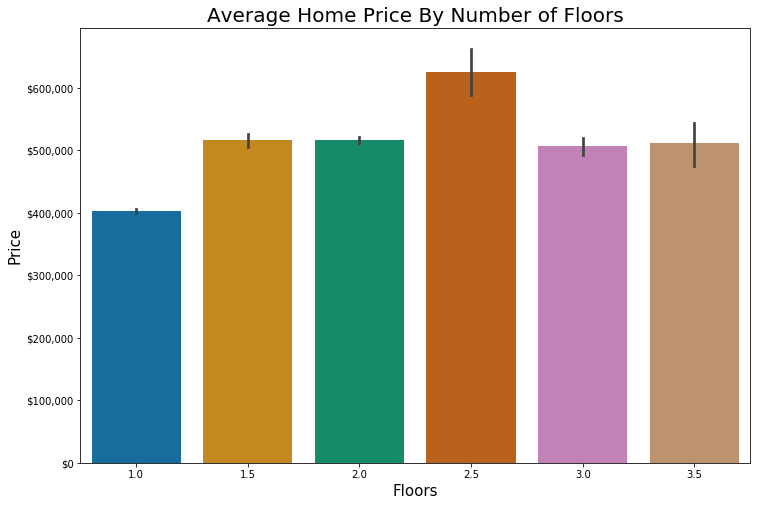

In [119]:
# Setting a figure size and plotting
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(x='floors', y='price', data=df4, palette="colorblind")

# Formatting the y-axis ticks to show as money
fmt_money = '${x:,.0f}'
tick_money = mtick.StrMethodFormatter(fmt_money)
ax.yaxis.set_major_formatter(tick_money)

# Setting title and labels
ax.set_xlabel('Floors', fontsize=15)
ax.set_ylabel('Price', fontsize=15)
ax.set_title('Average Home Price By Number of Floors', fontsize=20);

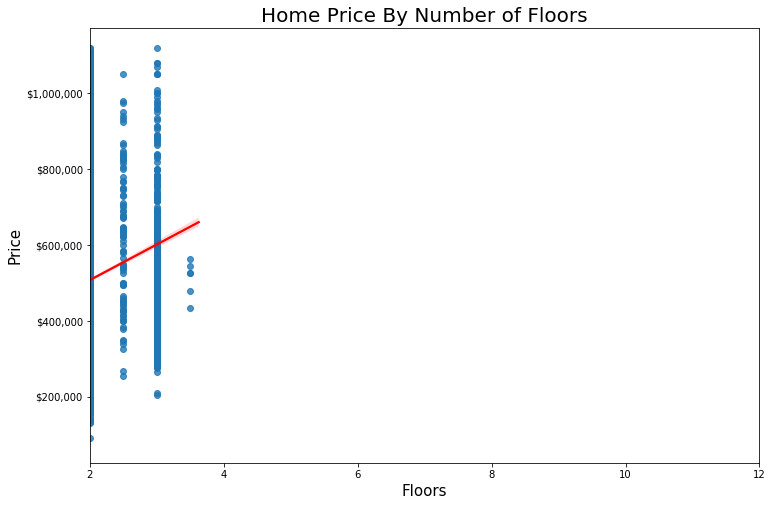

In [120]:
fig, ax = plt.subplots(figsize=(12,8))
sns.regplot(df4['floors'], df4['price'], line_kws={'color':'red'})

# Formatting the y-axis ticks to show as money
fmt_money = '${x:,.0f}'
tick_money = mtick.StrMethodFormatter(fmt_money)
ax.yaxis.set_major_formatter(tick_money)

# Setting the range of the x-ticks
ax.set(xlim=(2, 12))

# Setting title and labels
ax.set_xlabel('Floors', fontsize=15)
ax.set_ylabel('Price', fontsize=15)
ax.set_title('Home Price By Number of Floors', fontsize=20);

# Tableau Map

# Questions & Answers

# Conclusions